In [ ]:
%restart_python

UsageError: Line magic function `%restart_python` not found.


In [ ]:
dbutils.library.restartPython()

NameError: name 'dbutils' is not defined

In [ ]:
pip install xgboost

In [ ]:
%pip install openpyxl

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from IPython.display import display
import numpy as np
from sklearn.svm import OneClassSVM
import joblib



Filtrado de datos

In [ ]:
Archivo = pd.read_csv('pi_mdt_mtto_sag_15min.csv')

valores_mantener = [
    "Fecha",
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",
    "SAG2:260_PI_PROME_1",
    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062",
    "SAG2:260_PI_PROME_2",
    "SAG2:260_PI_1_2",
    "SAG2:260_PI_1_2_8h",
    "SAG2:260_PI_1_2_a1",
    "SAG2:260_PI_1_2_ACE_AVG",
    "SAG2:260_PI_1_2_c1",
    "SAG2:260_PI_1_2_PVHHTP",
    "SAG2:260_DPI_1_2",
    "SAG2:260_ML_04GIRO",
    "SAG2:260_ML_04GIRO2",
    "SAG2:260_ML_04GIRO_ST",
    "SAG2:260_ML_04TORQUE",
    "SAG2:260_ML_04GAP0",
    "SAG2:260_ML_04GAP90",
    "SAG2:260_ML_04GAP180",
    "SAG2:260_ML_04GAP270",
    "SAG2:260_ML_04JI",
    "SAG2:260_ml_04ji_8h",
    "SAG2:260_ml_04ji_ACE_AVG",
    "SAG2:260_ML_04IIS",
    "SAG2:260_ML_04SI",
    "SAG2:260_ML_04SI_a1",
    "SAG2:260_ML_04SI_ACE_AVG",
    "PROMEDIO_DEV_MOL501.Average",
    "SAG2:260_MS_01",
    "SAG2:260_MS_04",
    "SAG2:260_MS_05",
    "SAG2:260_MS_06",
    "SAG2:260_MS_07",
    "SAG2:260_MS_08",
    "SAG2:260_MS_09",
    "SAG2:260_MS_10",
    "PROMEDIO_TEMP_DESC_501.Average",
    "SAG2:260_ML_04ITHP1",
    "SAG2:260_ML_04ITHP2",
    "SAG2:Potencia_Pres_SAG2",
    "SAG2:260_ML_04DJI",
    "SAG2:t_oper_molsag2",
    "SAG2:260_DIC_1842",
    "SAG2:260_DIC_1842_a1",
    "SAG2:260_DIC_1842_ACE_AVG",
    "SAG2:260_DIC_1842_c1",
    "SAG2:260_ml_04CONEN",
    "SAG2:Pres_alim_SAG2",
    "SAG2:260_ML_04FI01",
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09",
    "SAG2:260_ML_04FI10",
    "SAG2:260_ML_04FI11",
    "SAG2:260_ML_04FI12",
    "SAG2:260_ML_04FI13",
    "SAG2:260_ML_04HS",
    "SAG2:260_ML_04HS3",
    "SAG2:260_ML_04HS4",
    "SAG2:260_ML_04HS5",
    "SAG2:260_ML_04HS_STATTIM1",
    "SAG2:260_ML_04HS_TIEMPO_ON",
    "SAG2:260_ML_04ITA01",
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03",
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",
    "SAG2:260_ML_04ITAC1",
    "SAG2:260_ML_04ITAC2",
    "SAG2:260_ML_04ITDA1",
    "SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDA4",
    "SAG2:260_ML_04ITDD1",
    "SAG2:260_ML_04ITDD2",
    "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4",
    "SAG2:260_ML_04ITDE1",
    "SAG2:260_ML_04ITDE2",
    "SAG2:260_ML_04ITDV10",
    "SAG2:260_ML_04ITDV60",
    "SAG2:260_ML_04ITDV110",
    "SAG2:260_ML_04ITDV160",
    "SAG2:260_ML_04ITDV210",
    "SAG2:260_ML_04ITDV260",
    "SAG2:260_ML_04ITDV310",
    "SAG2:260_ML_04ITDV360",
    "SAG2:260_ML_04ITDV410",
    "SAG2:260_ML_04ITDV460",
    "SAG2:260_ML_04ITDV510",
    "SAG2:260_ML_04ITDV560",
    "SAG2:260_ML_04ITDVAV",
    "SAG2:260_ML_04ITDVAV_ACE_AVG",
    "SAG2:260_ML_04SP",
    "SAG2:260_ML_04ST1",
    "SAG2:260_ML_04STAT",
    "SAG2:260_ML_04VELOC",
    "sag2:Est_Mol_501",
    "SAG2:260_FI_ML04",
    "SAG2:CV02_N(2)",
    "SAG2:CV01_N(2)",
    "SAG2:CV02_N(1)",
    "SAG2:CV01_N(1)",
    "SAG2:260_TI_1956",
    "sag2:Pres_alim_SAG",
    "SAG2:260_PI_MOL501",
    "sag2:260_wic_1835",
    "SAG2:260_PI_1942",
    "SAG2:260_DI_PROME_2",
    "SAG2:260_DI_1_1",
    "SAG2:260_PI_1_1",
    "SAG:ALIM_AGUAS_MOL_501",
    "SAG2:260_TI_1946",
    "SAG2:260_TI_1952",
    "SAG2:260_TI_1944"
]


columnas_existentes = []
for col in valores_mantener:
    if col in Archivo.columns:
        columnas_existentes.append(col)
df_filtrado = Archivo[columnas_existentes]
# df.columns: Devuelve una lista con los nombres de todas las columnas que existen en el DataFrame df
# columnas_existentes: Lista de nombres de columnas que existen en el DataFrame df
# col in df.columns: Devuelve True si el nombre de la columna col está en el DataFrame df
# col for col in df.columns: Itera sobre los nombres de columnas del DataFrame df

archivo_salida = "pi_mdt_mtto_sag_15min_filtrado.csv"
df_filtrado.to_csv(archivo_salida, index=False)

print(f"Archivo filtrado guardado como {archivo_salida}")

Archivo filtrado guardado como pi_mdt_mtto_sag_15min_filtrado.csv


In [ ]:
archivo_original = "pi_mdt_mtto_sag_15min_filtrado.csv"
Archivo = pd.read_csv(archivo_original)
Archivo = Archivo.interpolate(method='linear', limit_direction='both')
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-43-ada451dbfcf4>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Archivo = Archivo.interpolate(method='linear', limit_direction='both')


In [ ]:

Archivo['Fecha'] = pd.to_datetime(Archivo['Fecha'], format='%Y-%m-%d %H:%M:%S')  # Ajusta el formato si es diferente
print('Start time: ', Archivo['Fecha'].min())
print('End time: ', Archivo['Fecha'].max())
time_difference = Archivo['Fecha'].max() - Archivo['Fecha'].min()
print('Time difference: ', time_difference)

Start time:  2024-07-31 00:00:00
End time:  2025-01-27 12:00:00
Time difference:  180 days 12:00:00


**Interpolacion de datos**

Presión descanso P1,P2,P3 y P4 lado alimentación SAG 2

In [ ]:


columnas_interes = [
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032"
]



umbral_interpolacion = 800

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-45-dca167802a31>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-45-dca167802a31>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-45-dca167802a31>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-45-dca167802a31>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Presión descanso P1,P2,P3,P4 lado descarga SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062"
]


umbral_interpolacion = 650

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-46-e1636c3957e8>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-46-e1636c3957e8>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-46-e1636c3957e8>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-46-e1636c3957e8>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Temperatura TK aceite alta presión (limpio)
Temperatura TK retorno aceite alta presión (sucio)

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITHP1",
    "SAG2:260_ML_04ITHP2"

]

umbral_interpolacion = 35

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-47-8a0ab3232e9a>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-47-8a0ab3232e9a>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')


Flujo aceite descanso P1,P2,P3 Y P4 lado alimentación SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05"

]

umbral_interpolacion = 45

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-48-f11c29180e3a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-48-f11c29180e3a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-48-f11c29180e3a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-48-f11c29180e3a>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Flujo aceite descanso P1,P2,P3 Y P4 lado descarga SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09"

]

umbral_interpolacion = 57

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-49-15d54fc7be94>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-49-15d54fc7be94>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-49-15d54fc7be94>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-49-15d54fc7be94>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Flujo aceite descanso P1,P2,P3 Y P4 empu SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04FI10",
    "SAG2:260_ML_04FI11",
    "SAG2:260_ML_04FI12",
    "SAG2:260_ML_04FI13"

]
umbral_interpolacion = 7

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-50-8143bd438c8b>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-50-8143bd438c8b>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-50-8143bd438c8b>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-50-8143bd438c8b>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Temperatura agua enfriamiento alimentación SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITA01",
]


umbral_interpolacion = 2

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-51-aeb4e7df91d9>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')


Temperatura agua enfriamiento retorno SAG 2


Temperatura agua enfriamiento retorno SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03"

]


umbral_interpolacion = 25

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-52-0148c137f040>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-52-0148c137f040>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')


Temperatura agua enfriamiento motor SAG 2


In [ ]:

# Columnas a interpolar
columnas_interes = [
    "SAG2:260_ML_04ITA04", "SAG2:260_ML_04ITA05", "SAG2:260_ML_04ITA06", "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08", "SAG2:260_ML_04ITA09", "SAG2:260_ML_04ITA10", "SAG2:260_ML_04ITA11"
]



# Convertir las columnas a numéricas y aplicar interpolación
for columna in columnas_interes:
    if columna in Archivo.columns:
        Archivo[columna] = pd.to_numeric(Archivo[columna], errors='coerce')  # Convertir a numérico
        Archivo[columna] = Archivo[columna].interpolate(method='linear', limit_direction="both")  # Interpolar NaN

# Guardar el archivo interpolado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

print("Interpolación completada y guardada en 'pi_mdt_mtto_sag_15min_filtrado_interpolado.csv'")


Interpolación completada y guardada en 'pi_mdt_mtto_sag_15min_filtrado_interpolado.csv'


Temperatura descanso 1,2,3 y 4 alimentación SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITDA1",
    "SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDA4"

]


umbral_interpolacion = 8

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-54-7077378079dc>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-54-7077378079dc>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-54-7077378079dc>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-54-7077378079dc>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Temperatura descanso 1,2,3 y 4 descarga SAG 2

In [ ]:

columnas_interes = [
    "SAG2:260_ML_04ITDD1",
    "SAG2:260_ML_04ITDD2",
    "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4"

]




umbral_interpolacion = 30

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-55-1337acb2467f>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-55-1337acb2467f>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-55-1337acb2467f>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-55-1337acb2467f>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(meth

Temperatura descanso EMP izquierdo y derecho SAG 2

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITDE1",
    "SAG2:260_ML_04ITDE2"
]

umbral_interpolacion = 32

for columna in columnas_interes:
    if columna in Archivo.columns:
        # Reemplazar valores menores al umbral por NaN
        Archivo[columna] = Archivo[columna].mask(Archivo[columna] < umbral_interpolacion, np.nan)

        # Interpolación lineal
        Archivo[columna] = Archivo[columna].interpolate(method='linear')

        # Rellenar NaN iniciales y finales
        Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')

# Guardar el archivo procesado
Archivo.to_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", index=False)

<ipython-input-56-edc19dc39ceb>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')
<ipython-input-56-edc19dc39ceb>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Archivo[columna] = Archivo[columna].fillna(method='bfill').fillna(method='ffill')


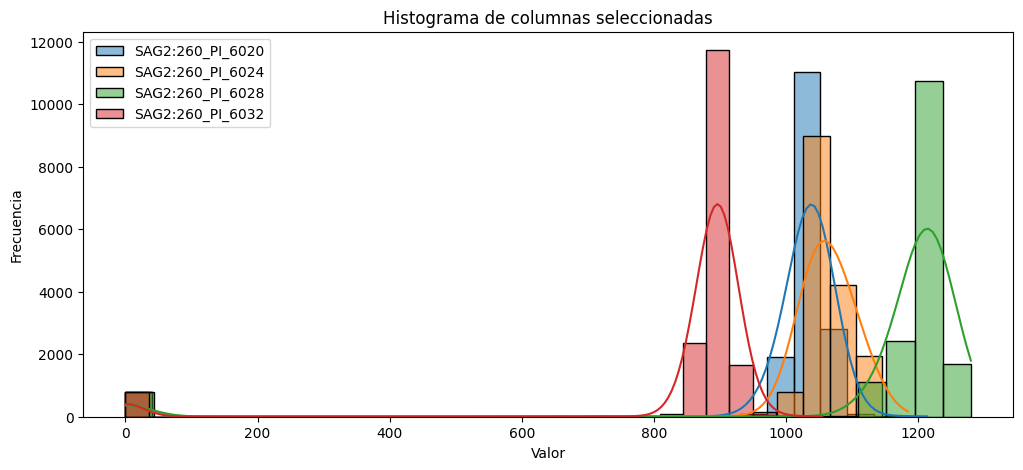

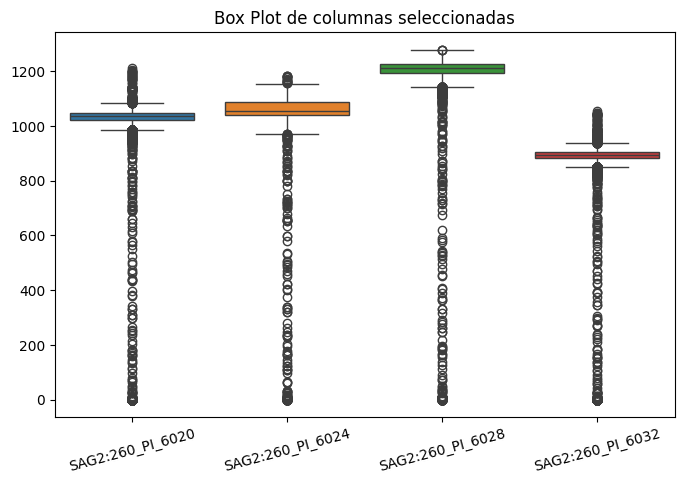


Estadísticas descriptivas:
                  Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)   Máximo
SAG2:260_PI_6020   0.000  1023.217            1037.111  1047.452 1213.133
SAG2:260_PI_6024   0.000  1040.494            1053.610  1086.805 1183.753
SAG2:260_PI_6028   0.000  1192.236            1211.277  1225.709 1279.290
SAG2:260_PI_6032   0.000   883.640             895.042   905.042 1054.506


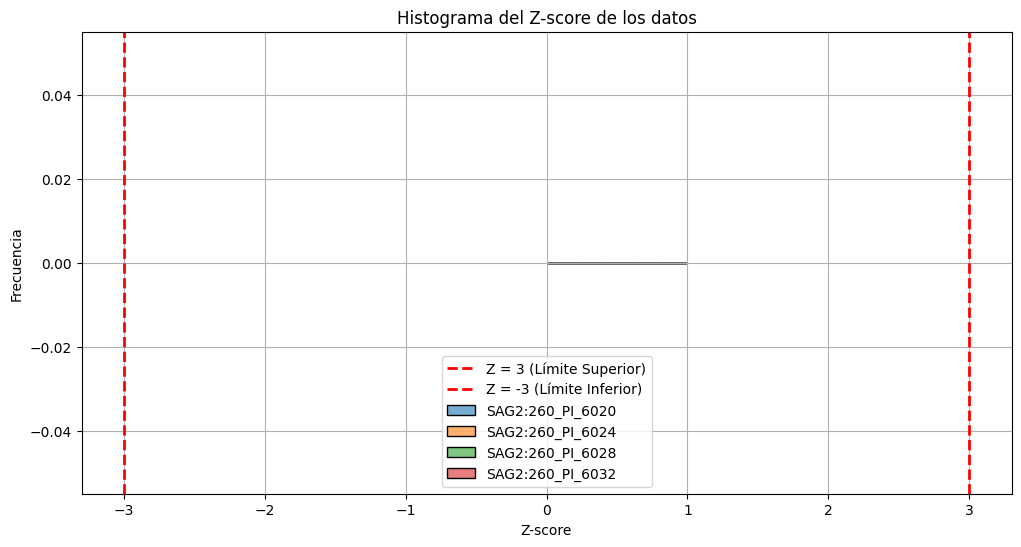


Cantidad de valores anómalos por columna:
            Columna  Cantidad de Outliers
0  SAG2:260_PI_6020                     0
1  SAG2:260_PI_6024                     0
2  SAG2:260_PI_6028                     0
3  SAG2:260_PI_6032                     0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Cargar el archivo CSV
archivo_csv = "pi_mdt_mtto_sag_15min_filtrado.csv"
Archivo = pd.read_csv(archivo_csv)

# Definir las columnas de interés
columnas_interes = [
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032"
]

# Verificar que las columnas existen en el DataFrame
columnas_presentes = [col for col in columnas_interes if col in Archivo.columns]

# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_presentes:
    sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_presentes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_presentes].min(),
    "Q1 (25%)": Archivo[columnas_presentes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_presentes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_presentes].quantile(0.75),
    "Máximo": Archivo[columnas_presentes].max()
})

# Configuración de pandas para mostrar todas las columnas correctamente
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.3f}".format)

# Mostrar la tabla con estadísticas
print("\nEstadísticas descriptivas:")
print(estadisticas)

# Calcular Z-score
z_scores = Archivo[columnas_presentes].apply(zscore)

# Crear histograma de Z-score
plt.figure(figsize=(12, 6))
for columna in columnas_presentes:
    sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)

# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Identificar valores anómalos (outliers con |Z| > 3)
outliers = (z_scores.abs() > 3)

# Contar cantidad de valores anómalos por columna
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad de Outliers"]

# Mostrar cantidad de valores anómalos
print("\nCantidad de valores anómalos por columna:")
print(df_outliers_cantidad)

# Extraer los datos anómalos
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_presentes]

# Guardar los resultados en archivos Excel
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

HISTOGRAMA


BOX PLOT


ZCORE

Presión descanso P1,P2,P3 y P4 lado alimentación SAG 2

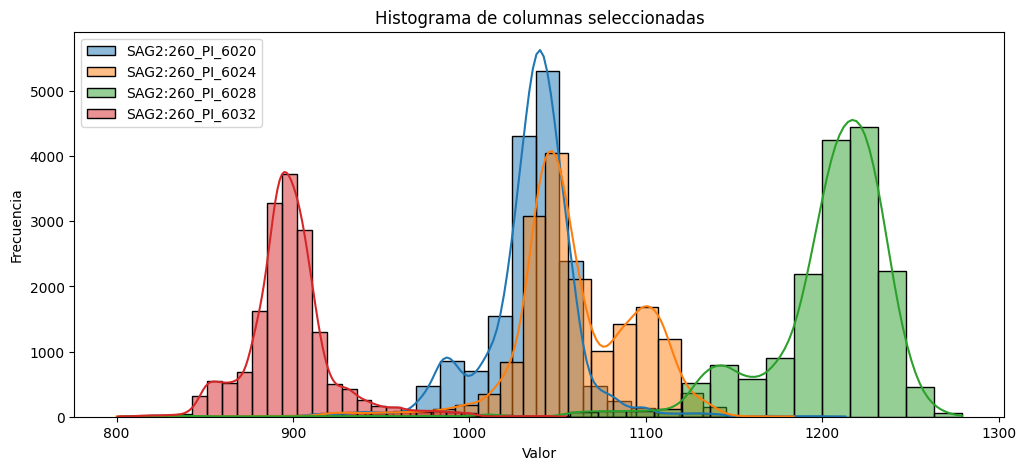

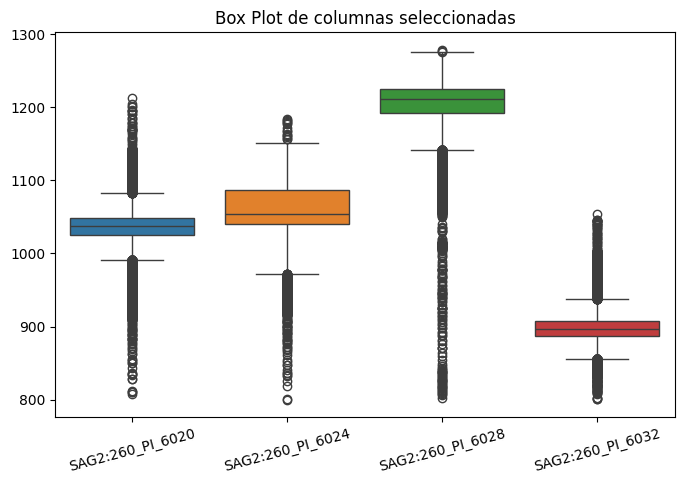

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)   Máximo
SAG2:260_PI_6020 807.914  1025.653            1038.167  1048.533 1213.133
SAG2:260_PI_6024 800.082  1041.018            1053.908  1086.833 1183.753
SAG2:260_PI_6028 802.476  1192.277            1211.233  1225.682 1279.290
SAG2:260_PI_6032 800.662   886.779             896.643   907.223 1054.506

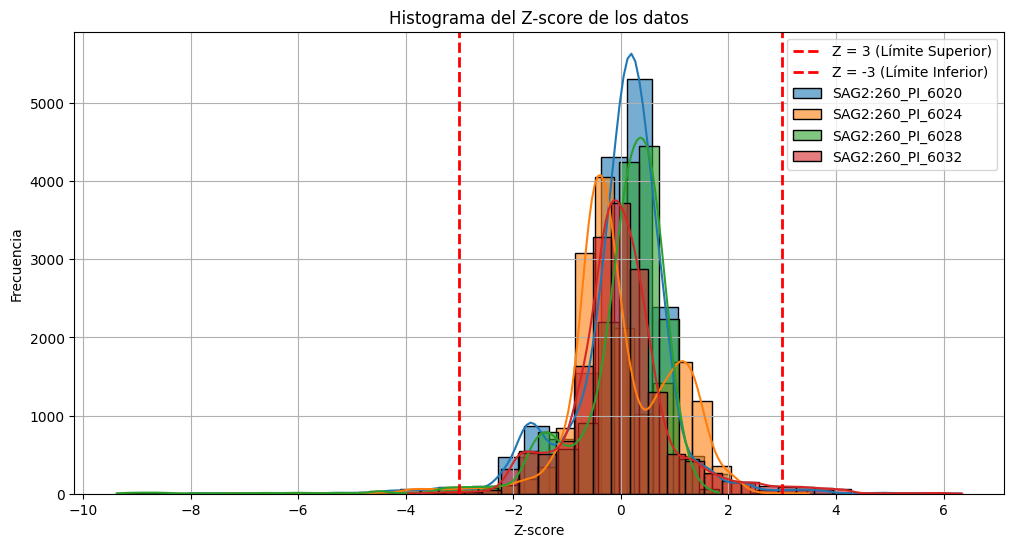

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_PI_6020       340
1  SAG2:260_PI_6024       241
2  SAG2:260_PI_6028       256
3  SAG2:260_PI_6032       354

In [ ]:
columnas_interes = [
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032"
]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)



# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Presión descanso P1,P2,P3,P4 lado descarga SAG 2

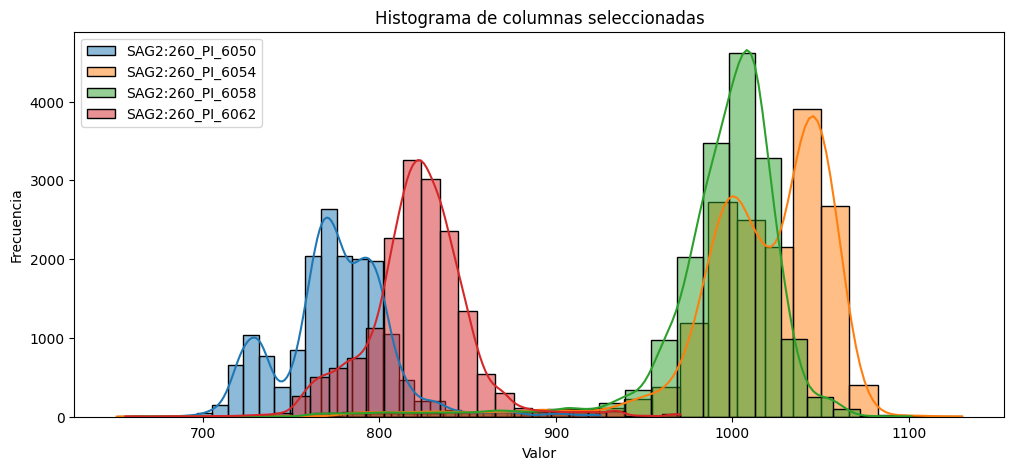

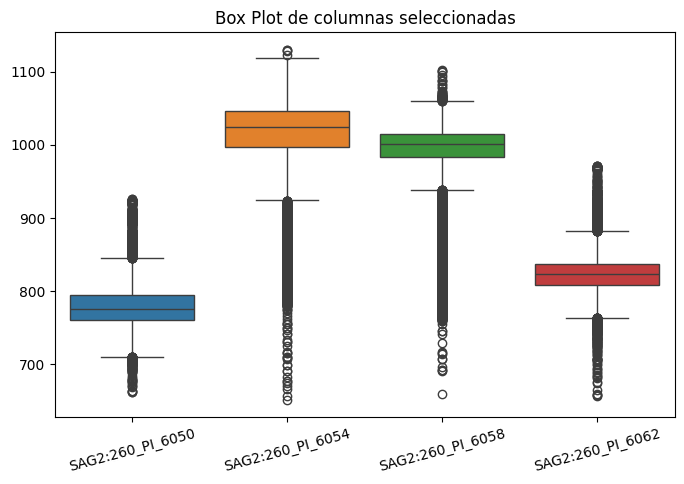

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)   Máximo
SAG2:260_PI_6050 661.453   759.948             775.314   793.712  925.189
SAG2:260_PI_6054 651.184   997.048            1024.471  1046.088 1130.154
SAG2:260_PI_6058 658.872   983.578            1001.163  1014.113 1101.523
SAG2:260_PI_6062 656.088   807.399             822.572   837.117  970.600

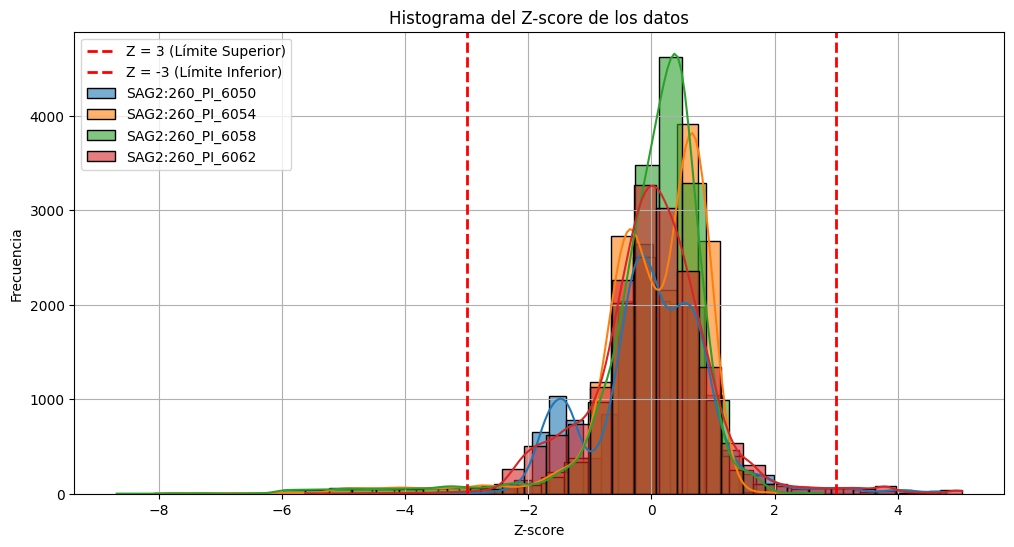

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_PI_6050       242
1  SAG2:260_PI_6054       420
2  SAG2:260_PI_6058       449
3  SAG2:260_PI_6062       290

In [ ]:
columnas_interes = [
    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062"
]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Temperatura TK aceite alta presión (limpio)
Temperatura TK retorno aceite alta presión (sucio)

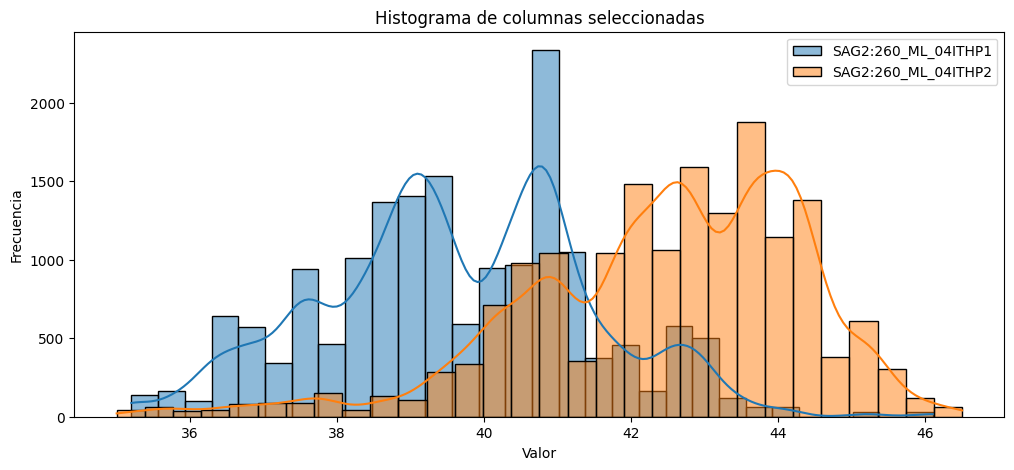

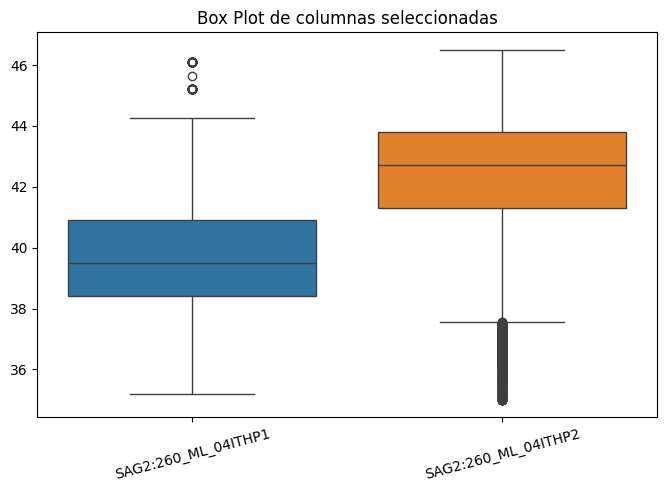

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITHP1  35.200    38.400              39.500    40.900  46.100
SAG2:260_ML_04ITHP2  35.000    41.300              42.700    43.800  46.500

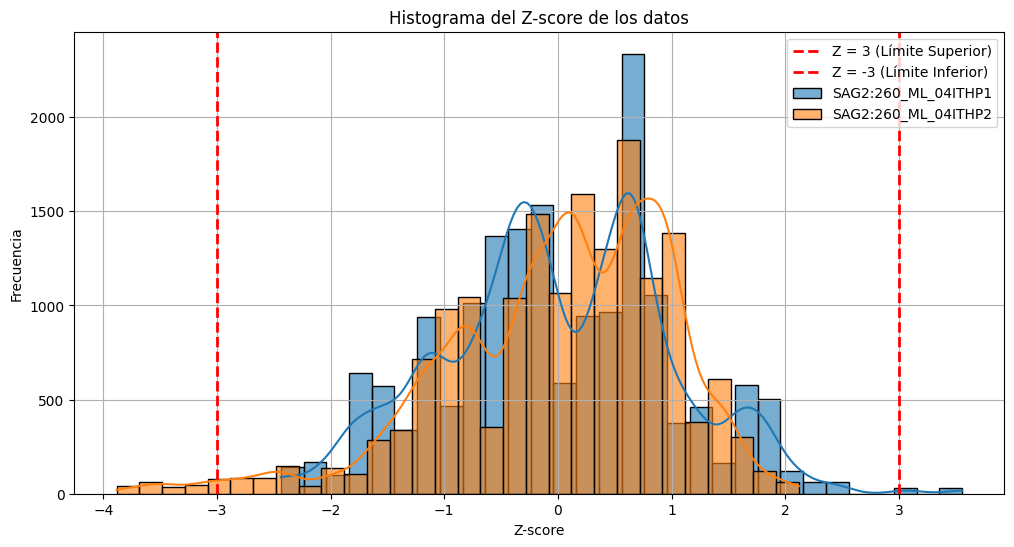

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITHP1        59
1  SAG2:260_ML_04ITHP2       232

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITHP1",
    "SAG2:260_ML_04ITHP2"

]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)



# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Flujo aceite descanso P1,P2,P3 Y P4 lado alimentación SAG 2

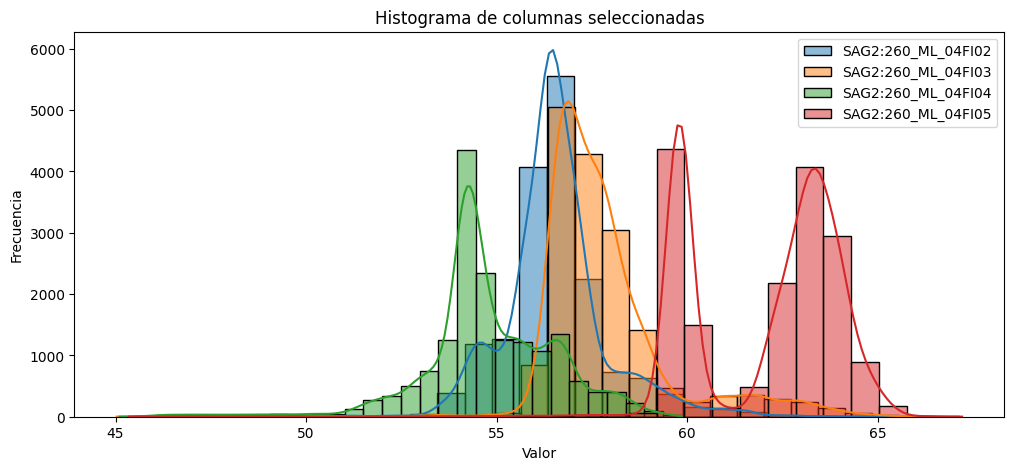

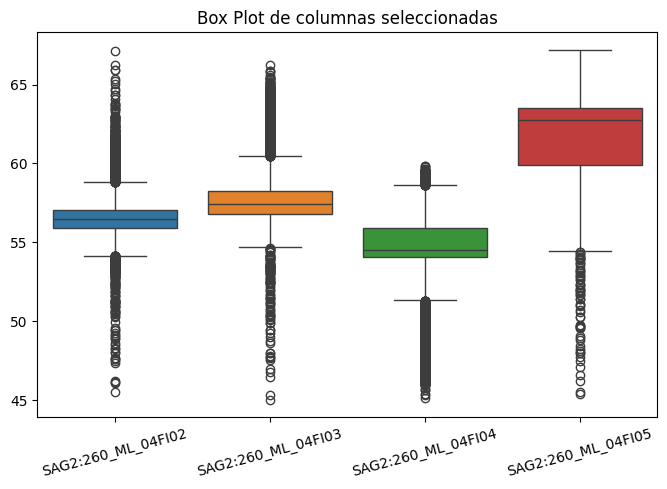

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04FI02  45.514    55.888              56.479    57.065  67.129
SAG2:260_ML_04FI03  45.031    56.817              57.442    58.271  66.272
SAG2:260_ML_04FI04  45.108    54.059              54.521    55.884  59.867
SAG2:260_ML_04FI05  45.356    59.896              62.750    63.536  67.220

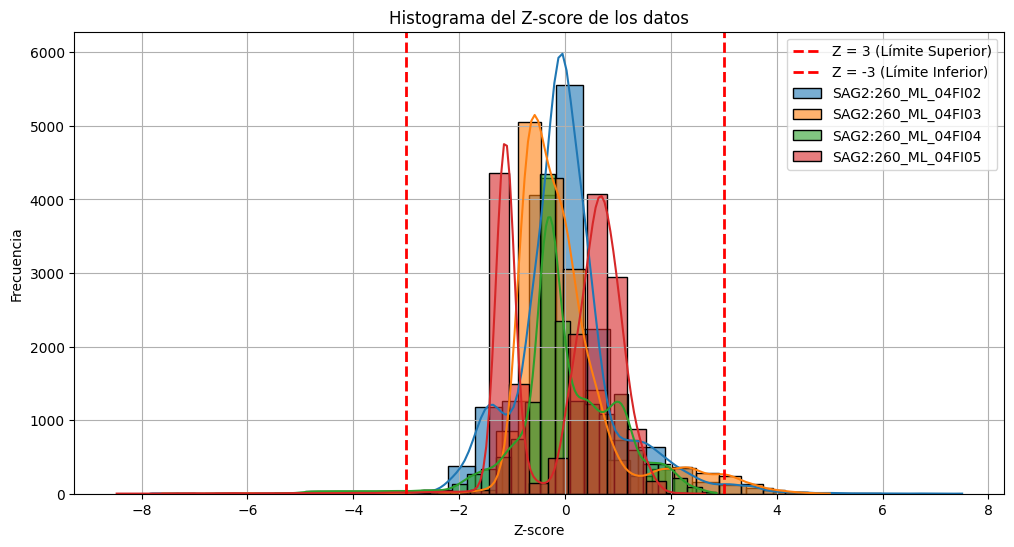

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04FI02       289
1  SAG2:260_ML_04FI03       447
2  SAG2:260_ML_04FI04       251
3  SAG2:260_ML_04FI05        95

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05"

]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Flujo aceite descanso P1,P2,P3 Y P4 lado descarga SAG 2

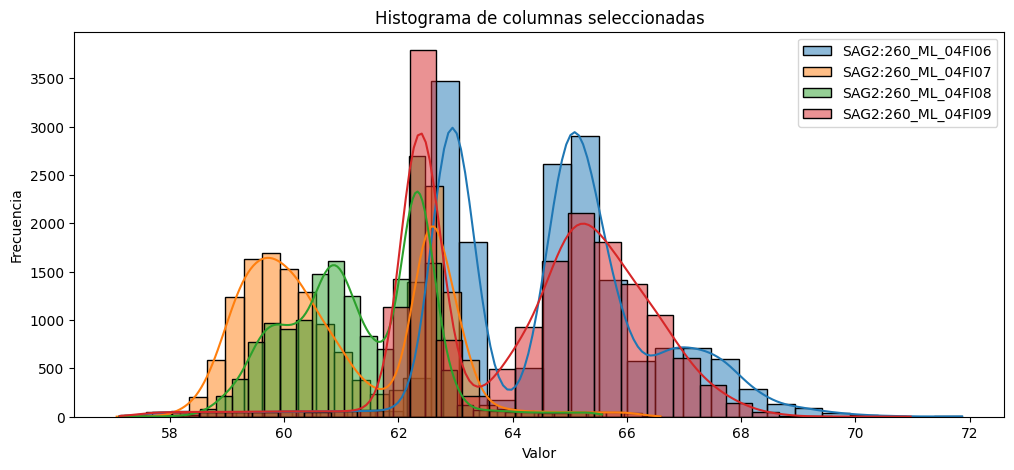

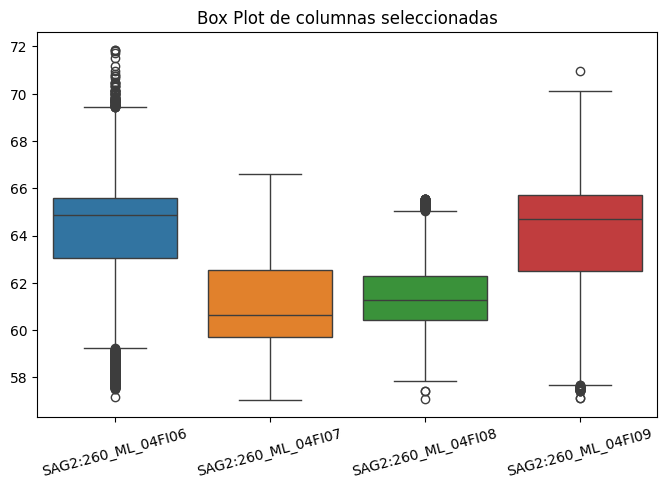

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04FI06  57.194    63.055              64.891    65.604  71.869
SAG2:260_ML_04FI07  57.066    59.697              60.625    62.526  66.589
SAG2:260_ML_04FI08  57.108    60.448              61.271    62.292  65.562
SAG2:260_ML_04FI09  57.119    62.495              64.712    65.708  70.968

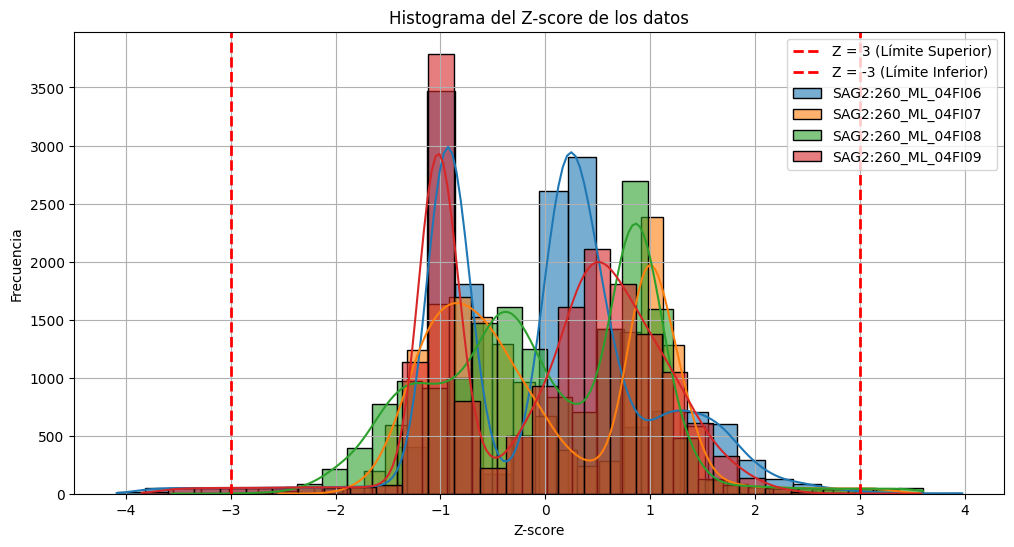

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04FI06       189
1  SAG2:260_ML_04FI07        80
2  SAG2:260_ML_04FI08       114
3  SAG2:260_ML_04FI09       139

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09"

]

# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Flujo aceite descanso P1,P2,P3 Y P4 empu SAG 2

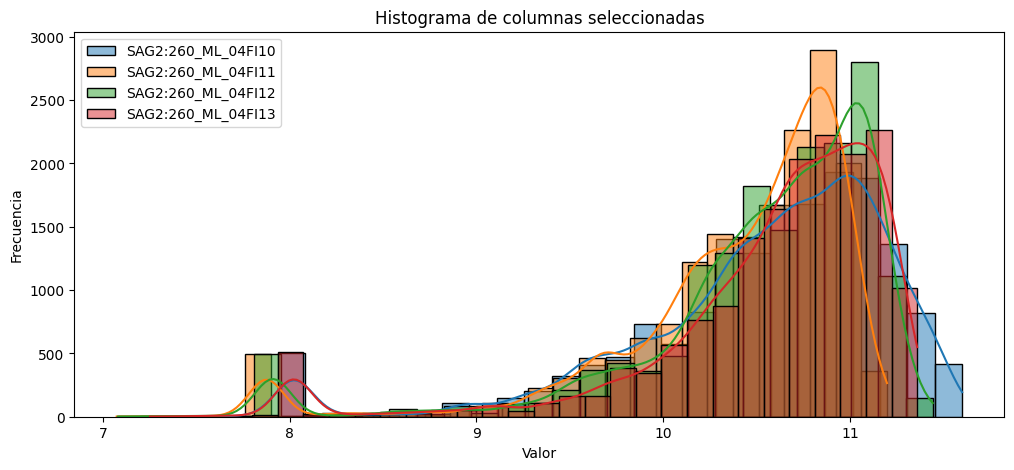

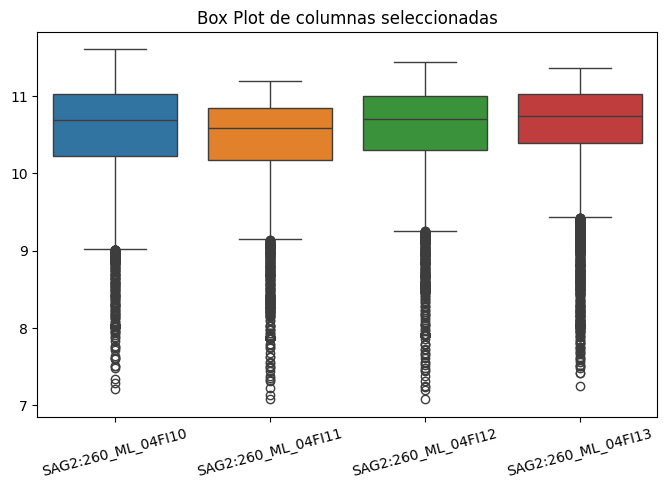

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04FI10   7.203    10.221              10.693    11.022  11.601
SAG2:260_ML_04FI11   7.073    10.166              10.589    10.846  11.199
SAG2:260_ML_04FI12   7.079    10.302              10.704    11.003  11.444
SAG2:260_ML_04FI13   7.251    10.387              10.745    11.026  11.360

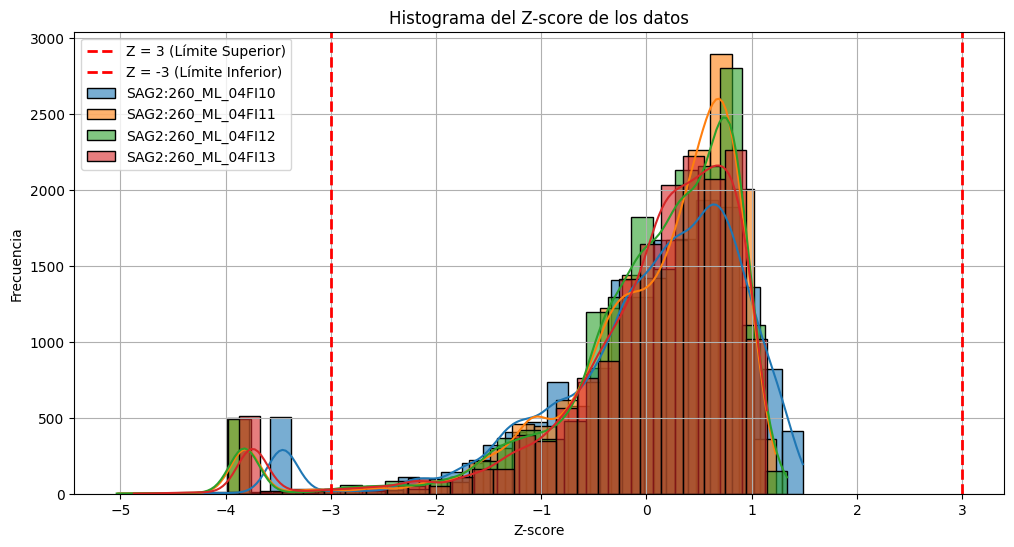

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04FI10       546
1  SAG2:260_ML_04FI11       580
2  SAG2:260_ML_04FI12       552
3  SAG2:260_ML_04FI13       610

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04FI10",
    "SAG2:260_ML_04FI11",
    "SAG2:260_ML_04FI12",
    "SAG2:260_ML_04FI13"

]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()
# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Temperatura agua enfriamiento alimentación SAG 2

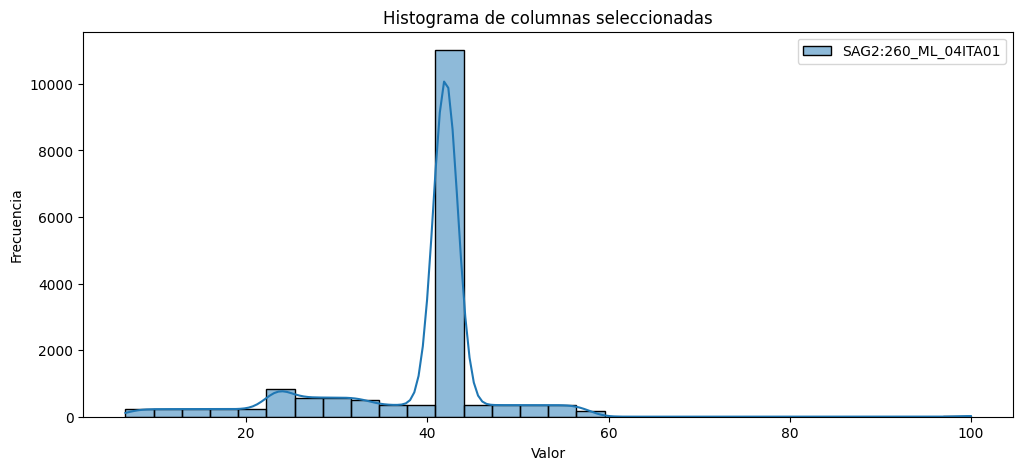

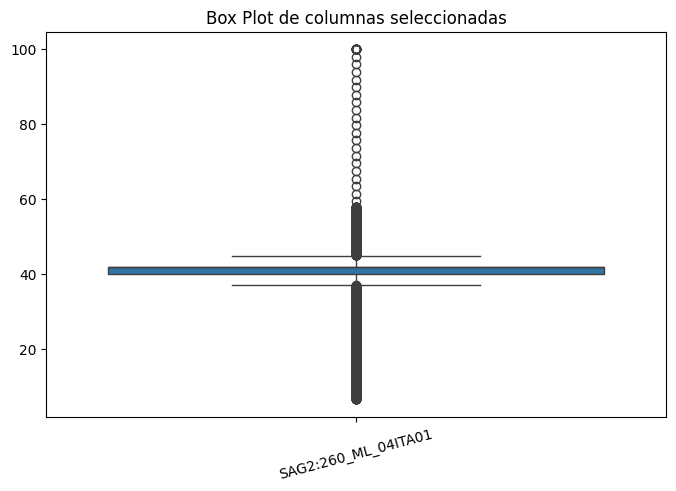

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITA01   6.667    40.000              42.000    42.000 100.000

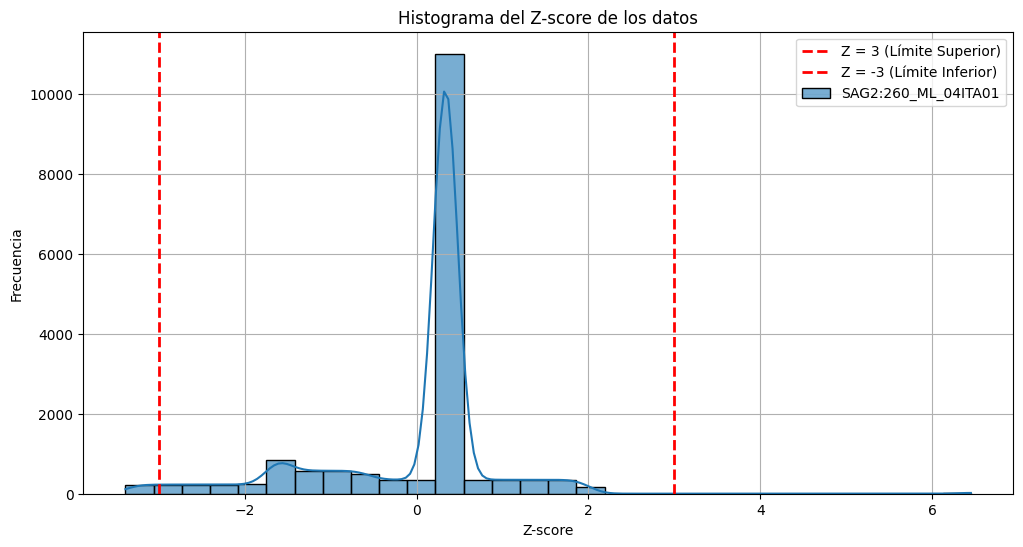

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITA01       307

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITA01",


]

# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()
# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Temperatura agua enfriamiento retorno SAG 2


Temperatura agua enfriamiento retorno SAG 2

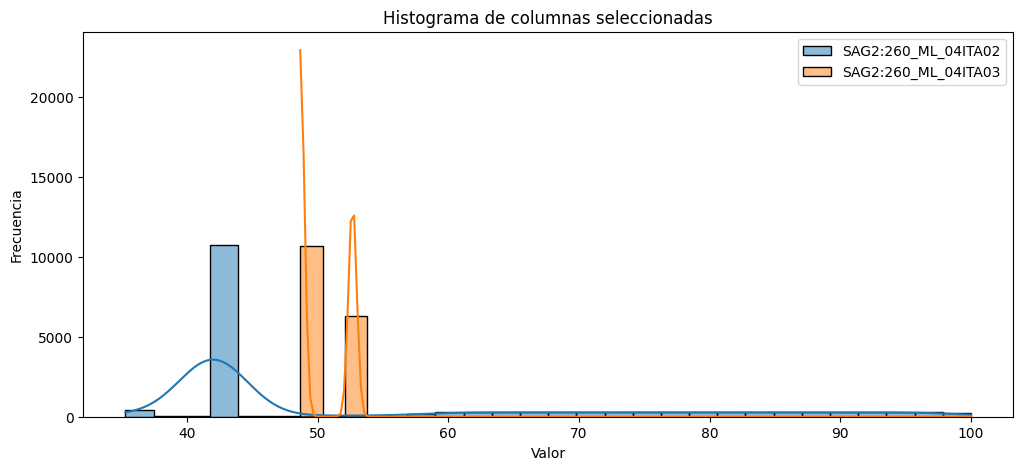

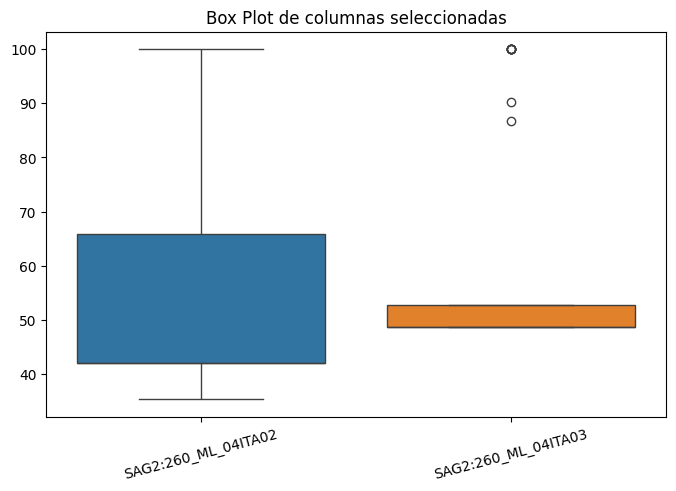

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITA02  35.289    42.000              42.000    65.929 100.000
SAG2:260_ML_04ITA03  48.667    48.667              48.667    52.676 100.000

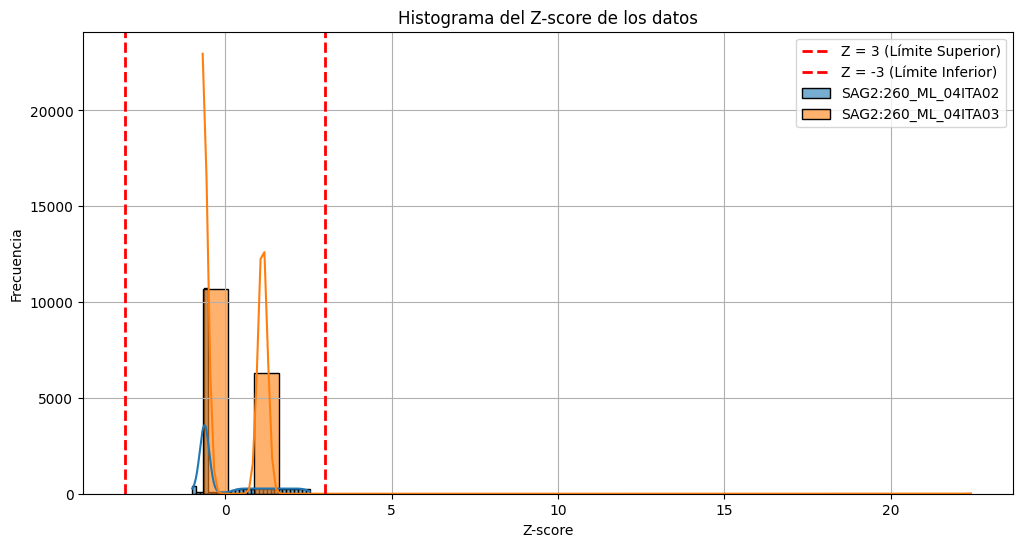

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITA02         0
1  SAG2:260_ML_04ITA03         9

In [ ]:

columnas_interes = [
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03"

]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()
# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Temperatura agua enfriamiento motor SAG 2

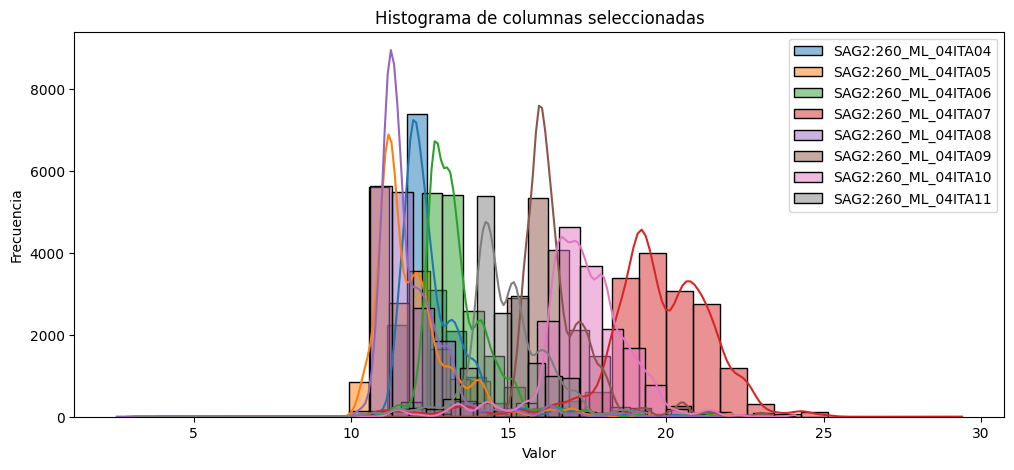

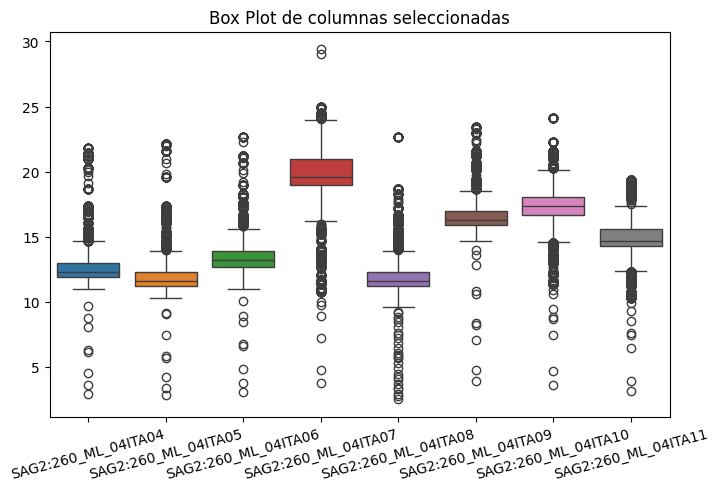

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITA04   2.987    11.900              12.300    13.000  21.800
SAG2:260_ML_04ITA05   2.874    11.200              11.600    12.300  22.100
SAG2:260_ML_04ITA06   3.092    12.700              13.200    13.900  22.700
SAG2:260_ML_04ITA07   3.763    19.000              19.600    21.000  29.400
SAG2:260_ML_04ITA08   2.552    11.200              11.600    12.300  22.700
SAG2:260_ML_04ITA09   3.925    15.900              16.300    17.000  23.400
SAG2:260_ML_04ITA10   3.611    16.700              17.400    18.100  24.100
SAG2:260_ML_04ITA11   3.186    14.300              14.700    15.600  19.400

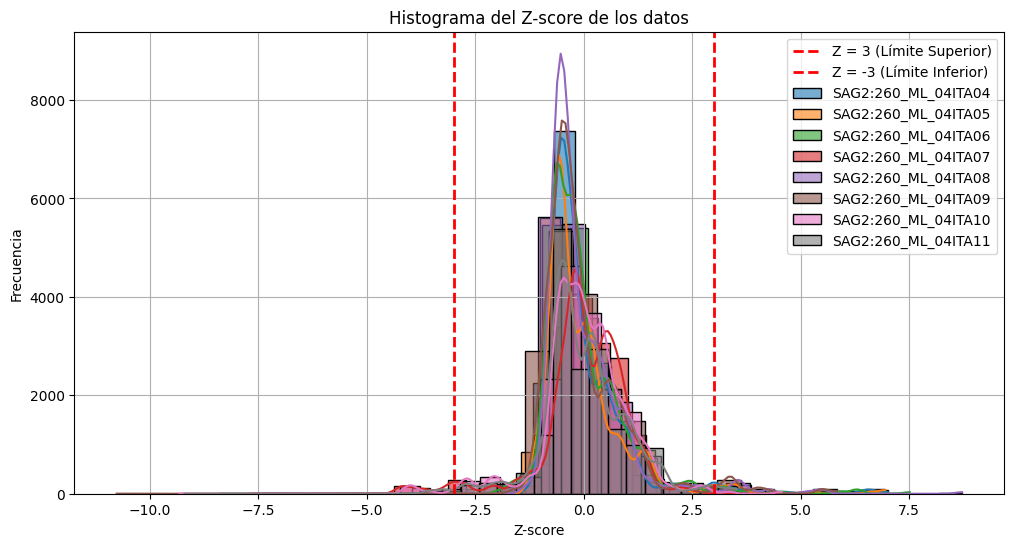

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITA04       360
1  SAG2:260_ML_04ITA05       401
2  SAG2:260_ML_04ITA06       365
3  SAG2:260_ML_04ITA07       490
4  SAG2:260_ML_04ITA08       442
5  SAG2:260_ML_04ITA09       549
6  SAG2:260_ML_04ITA10       257
7  SAG2:260_ML_04ITA11       277

In [ ]:


columnas_interes = [
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11"

]
# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()
# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Temperatura descanso 1,2,3 y 4 alimentación SAG 2

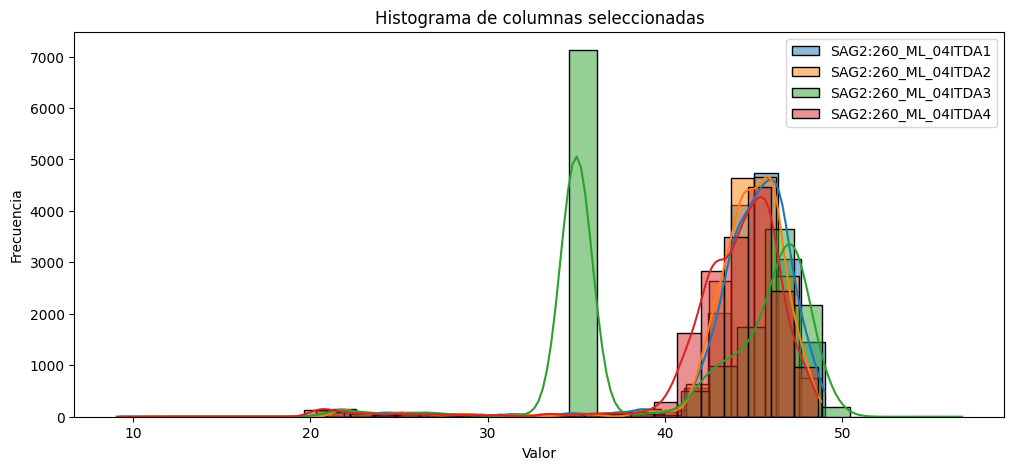

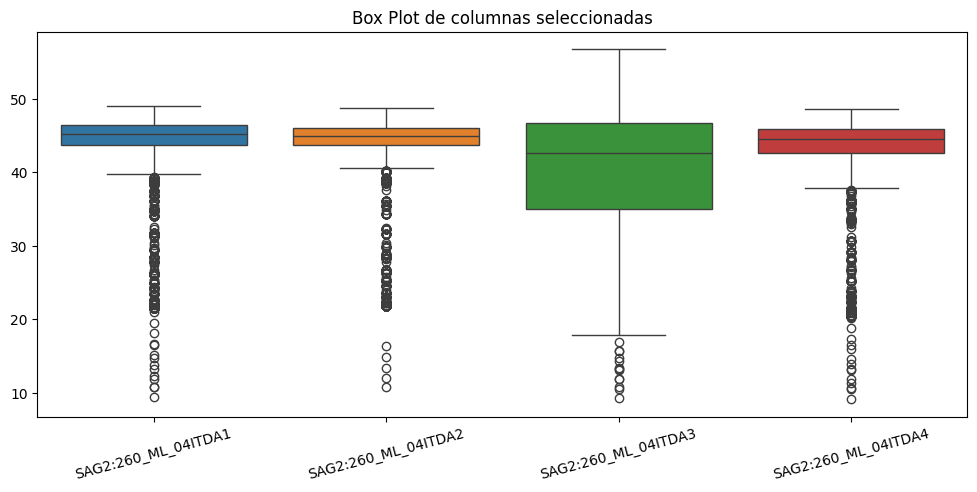

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITDA1   9.394    43.800              45.200    46.500  49.000
SAG2:260_ML_04ITDA2  10.820    43.800              45.000    46.100  48.800
SAG2:260_ML_04ITDA3   9.232    35.000              42.700    46.800  56.748
SAG2:260_ML_04ITDA4   9.086    42.700              44.500    45.900  48.600

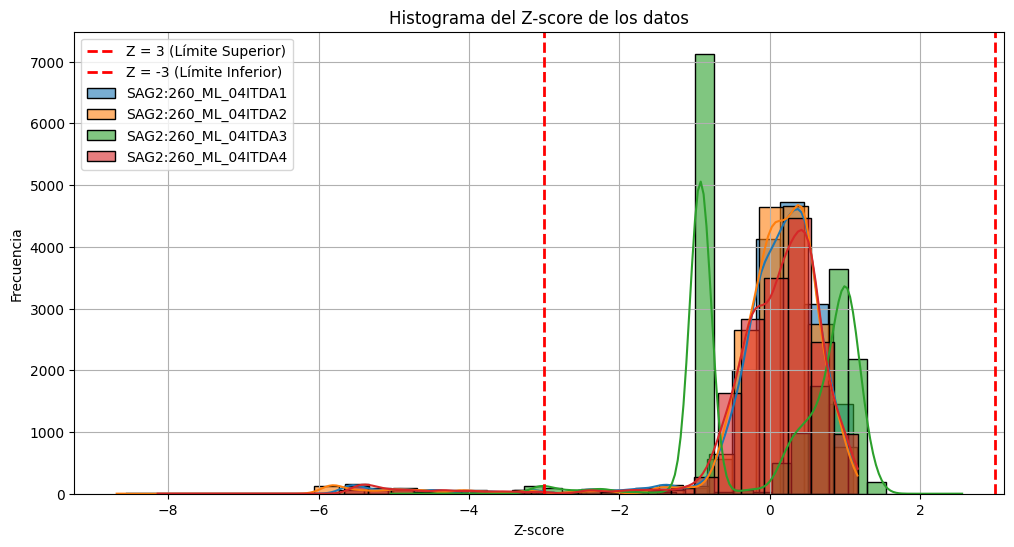

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITDA1       527
1  SAG2:260_ML_04ITDA2       524
2  SAG2:260_ML_04ITDA3       141
3  SAG2:260_ML_04ITDA4       538

In [ ]:



columnas_interes = [
    "SAG2:260_ML_04ITDA1",
    "SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDA4"

]

# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

Temperatura descanso 1,2,3 y 4 descarga SAG 2

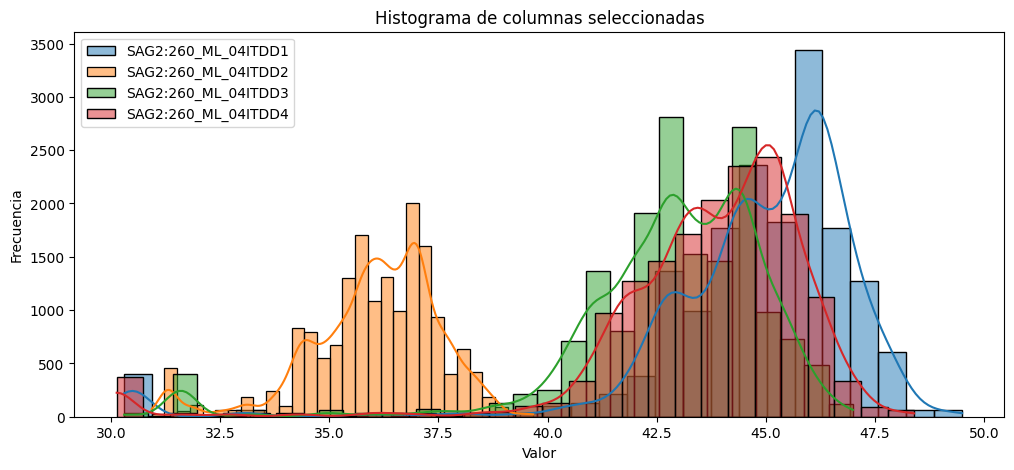

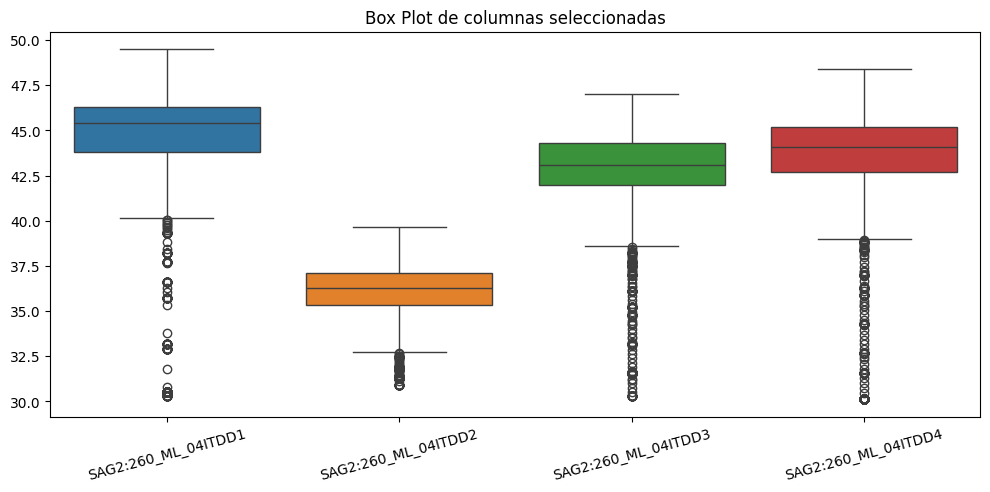

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITDD1  30.300    43.800              45.400    46.300  49.500
SAG2:260_ML_04ITDD2  30.932    35.340              36.252    37.088  39.672
SAG2:260_ML_04ITDD3  30.300    42.000              43.100    44.300  47.000
SAG2:260_ML_04ITDD4  30.129    42.700              44.100    45.200  48.400

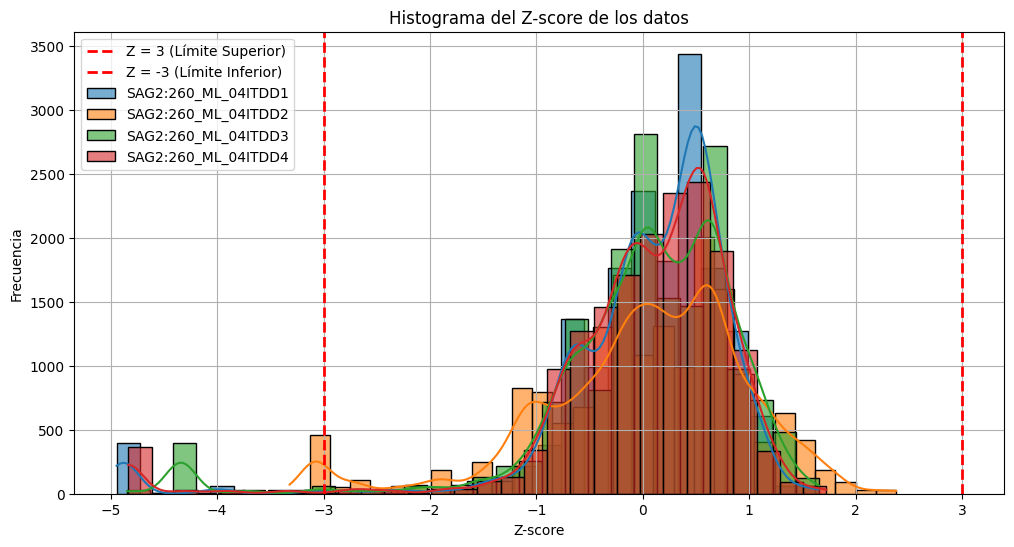

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITDD1       489
1  SAG2:260_ML_04ITDD2       488
2  SAG2:260_ML_04ITDD3       509
3  SAG2:260_ML_04ITDD4       476

In [ ]:


columnas_interes = [
    "SAG2:260_ML_04ITDD1",
    "SAG2:260_ML_04ITDD2",
    "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4"

]



# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)


Temperatura descanso EMP izquierdo y derecho SAG 2

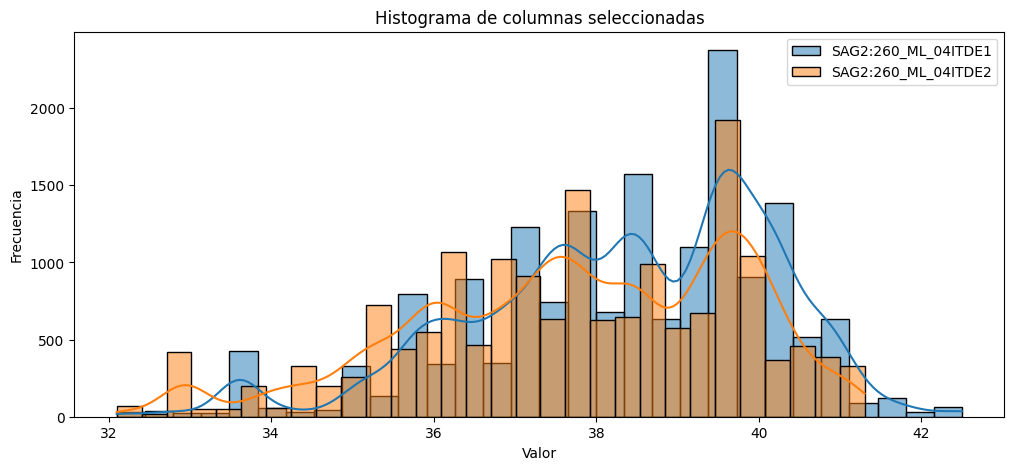

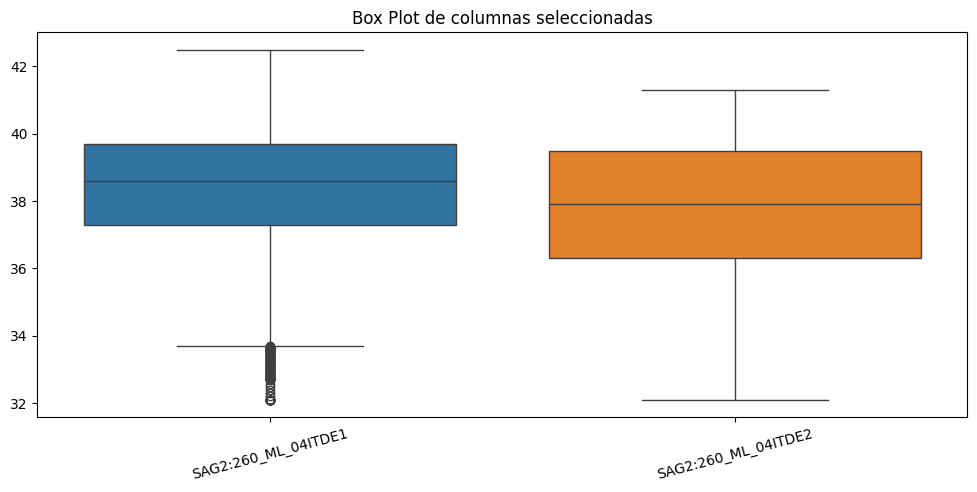

Mínimo  Q1 (25%)  Mediana (Q2 - 50%)  Q3 (75%)  Máximo
SAG2:260_ML_04ITDE1  32.100    37.300              38.600    39.700  42.500
SAG2:260_ML_04ITDE2  32.100    36.300              37.900    39.500  41.300

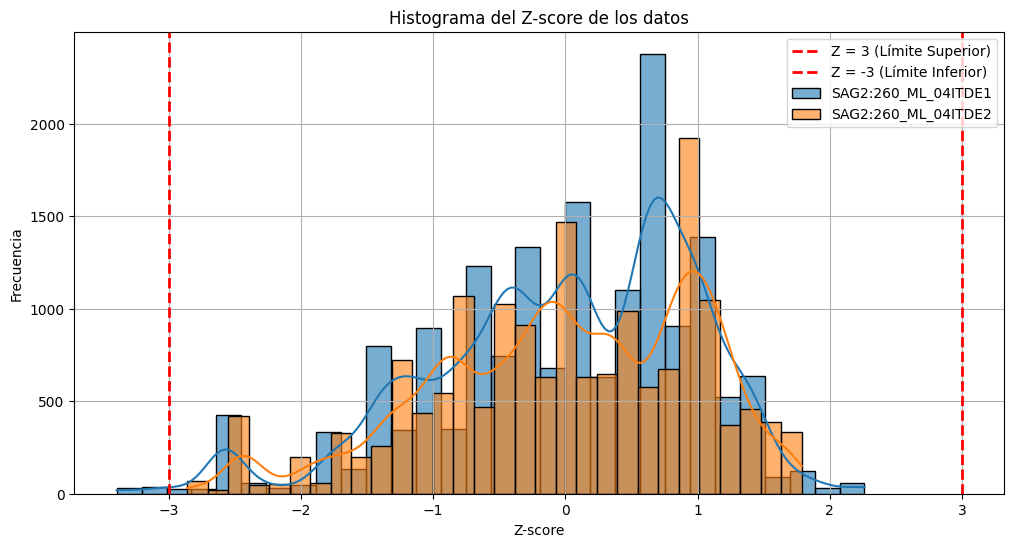

Cantidad de valores anómalos por columna:


Columna  Cantidad
0  SAG2:260_ML_04ITDE1        74
1  SAG2:260_ML_04ITDE2         0

In [ ]:

columnas_interes = [
    "SAG2:260_ML_04ITDE1",
    "SAG2:260_ML_04ITDE2",

]


# Crear histogramas
plt.figure(figsize=(12, 5))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(Archivo[columna], bins=30, kde=True, label=columna)

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de columnas seleccionadas")
plt.legend()
plt.show()

# Crear Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=Archivo[columnas_interes])
plt.title("Box Plot de columnas seleccionadas")
plt.xticks(rotation=15)
plt.show()

# Calcular estadísticas clave correctamente
estadisticas = pd.DataFrame({
    "Mínimo": Archivo[columnas_interes].min(),
    "Q1 (25%)": Archivo[columnas_interes].quantile(0.25),
    "Mediana (Q2 - 50%)": Archivo[columnas_interes].quantile(0.50),
    "Q3 (75%)": Archivo[columnas_interes].quantile(0.75),
    "Máximo": Archivo[columnas_interes].max()
})

# Asegurar que se muestren todas las columnas sin cortar
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.width", 1000)  # Ajustar el ancho
pd.set_option("display.float_format", "{:.3f}".format)  # Redondear decimales a 3 cifras

# Mostrar la tabla correctamente
display(estadisticas)





# Calcular Z-score
z_scores = Archivo[columnas_interes].apply(zscore)

# Convertir en una sola lista todos los Z-scores
z_all = z_scores.values.flatten()

# Crear el histograma
plt.figure(figsize=(12, 6))
for columna in columnas_interes:
    if columna in Archivo.columns:
        sns.histplot(z_scores[columna], bins=30, kde=True, label=columna, alpha=0.6)


# Líneas de umbral para outliers
plt.axvline(x=3, color='r', linestyle='--', linewidth=2, label="Z = 3 (Límite Superior)")
plt.axvline(x=-3, color='r', linestyle='--', linewidth=2, label="Z = -3 (Límite Inferior)")

# Etiquetas y título
plt.xlabel("Z-score")
plt.ylabel("Frecuencia")
plt.title("Histograma del Z-score de los datos")
plt.legend()
plt.grid(True)
plt.show()

# Filtrar valores fuera del rango (-3, 3) SOLO en las columnas de interés
outliers = (z_scores.abs() > 3)

# Mostrar la cantidad de valores anómalos por columna
print("Cantidad de valores anómalos por columna:")
df_outliers_cantidad = outliers.sum().reset_index()
df_outliers_cantidad.columns = ["Columna", "Cantidad"]
display(df_outliers_cantidad)

# Mostrar los valores anómalos encontrados solo en las columnas de interés
df_outliers_datos = Archivo.loc[outliers.any(axis=1), columnas_interes]

#print("\nValores anómalos encontrados:")
#display(df_outliers_datos)

# Guardar los resultados en archivos Excel si se necesitan
df_outliers_cantidad.to_excel("outliers_cantidad.xlsx", index=False)
df_outliers_datos.to_excel("outliers_datos.xlsx", index=False)

**Matriz de correlacion**

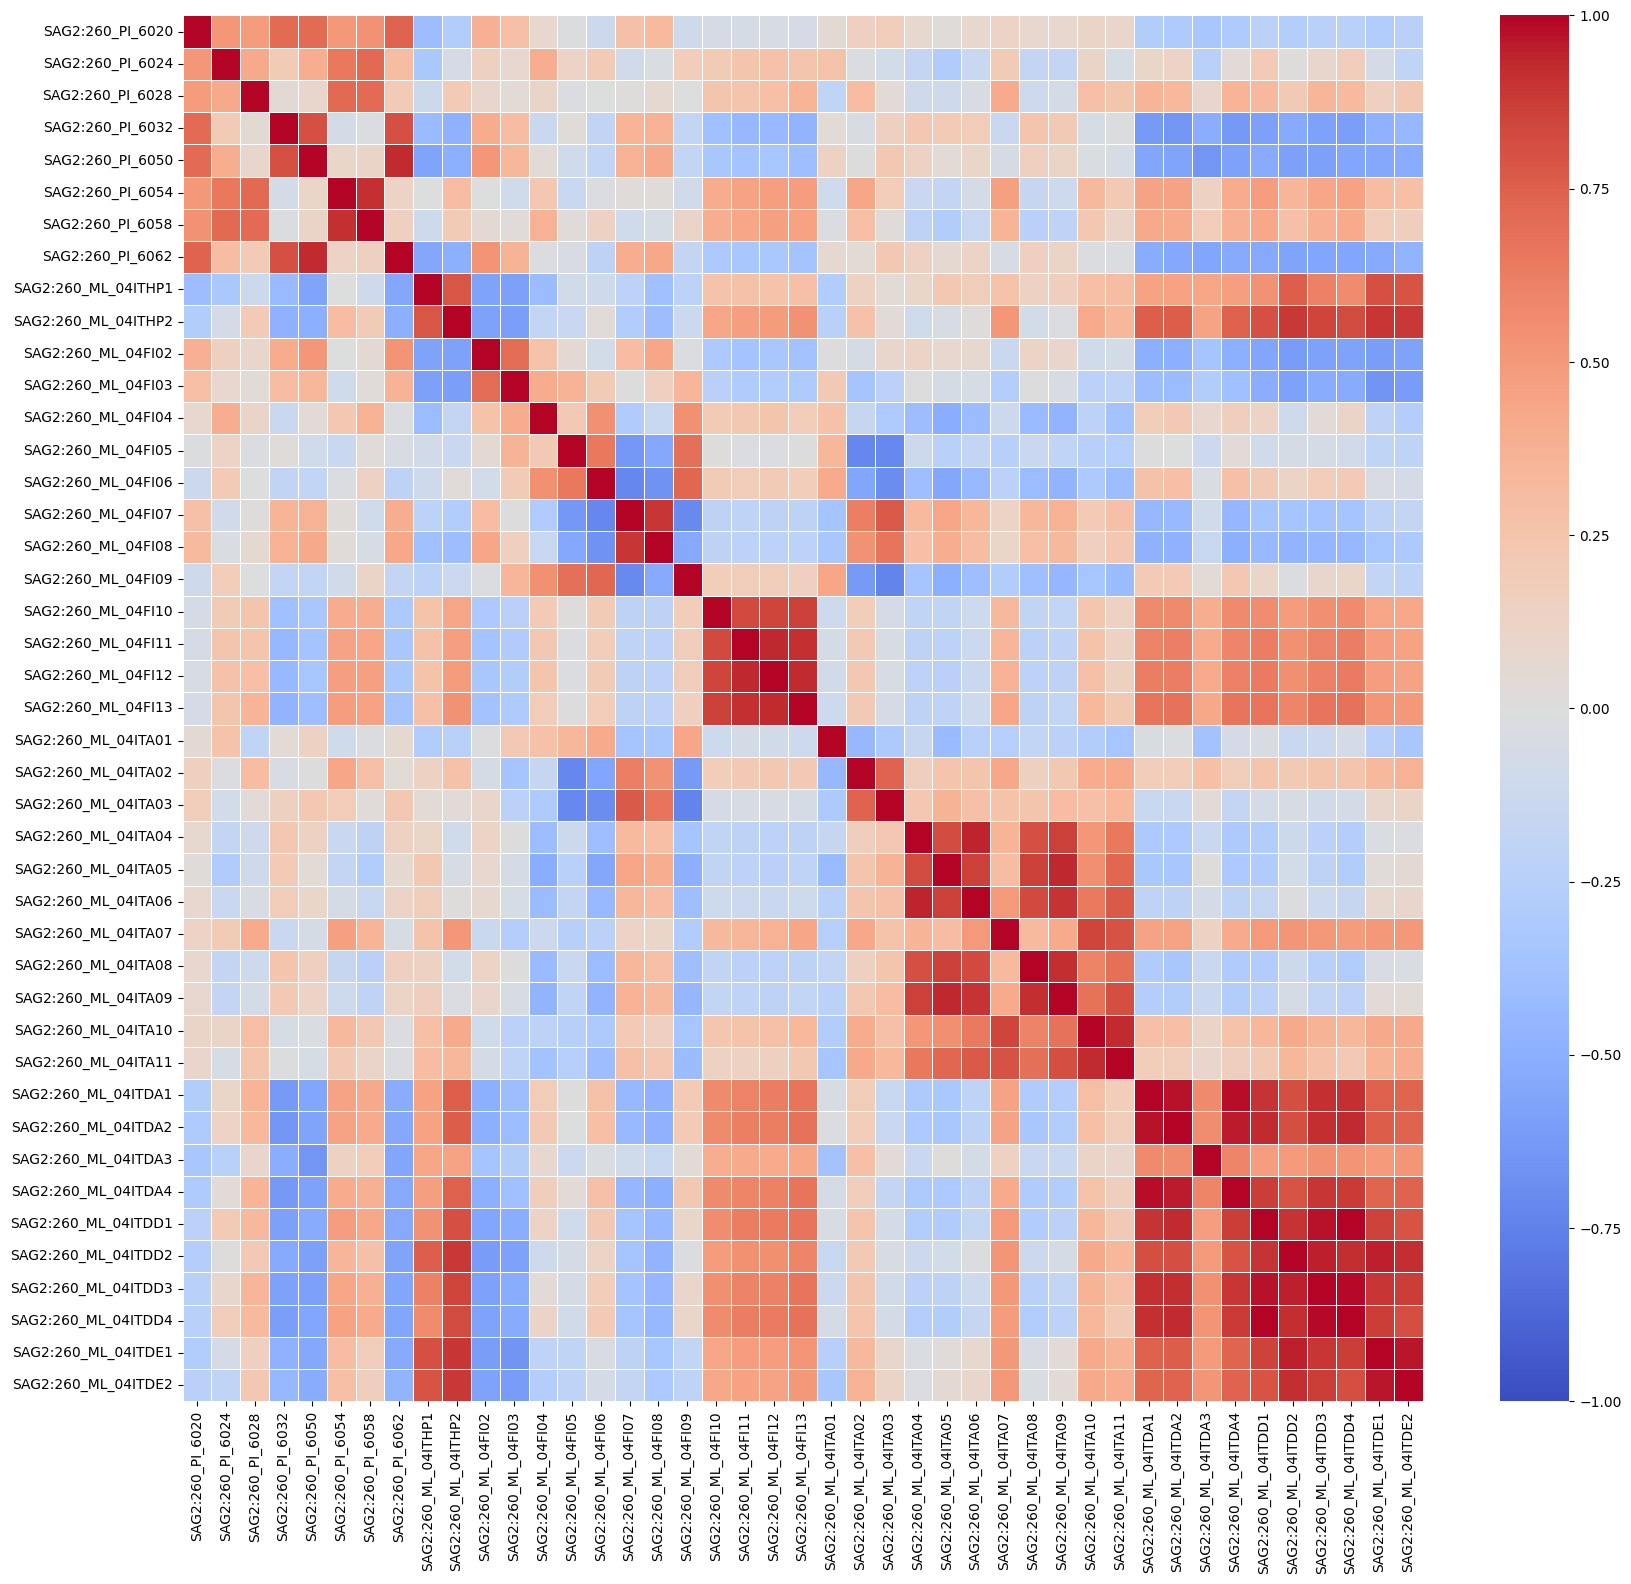

In [ ]:



columnas_interes = [
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",

    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062",

    "SAG2:260_ML_04ITHP1",
    "SAG2:260_ML_04ITHP2",
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09",
    "SAG2:260_ML_04FI10",
    "SAG2:260_ML_04FI11",
    "SAG2:260_ML_04FI12",
    "SAG2:260_ML_04FI13",
    "SAG2:260_ML_04ITA01",
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03",
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
     "SAG2:260_ML_04ITA08",
     "SAG2:260_ML_04ITA09",
     "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",
    "SAG2:260_ML_04ITDA1",
    "SAG2:260_ML_04ITDA2",
     "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDA4", "SAG2:260_ML_04ITDD1", "SAG2:260_ML_04ITDD2", "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4", "SAG2:260_ML_04ITDE1", "SAG2:260_ML_04ITDE2"
]



Archivo_interes = Archivo[columnas_interes]


matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(20, 18))
sns.heatmap(matriz_correlacion,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Presión descanso lado alimentación SAG 2

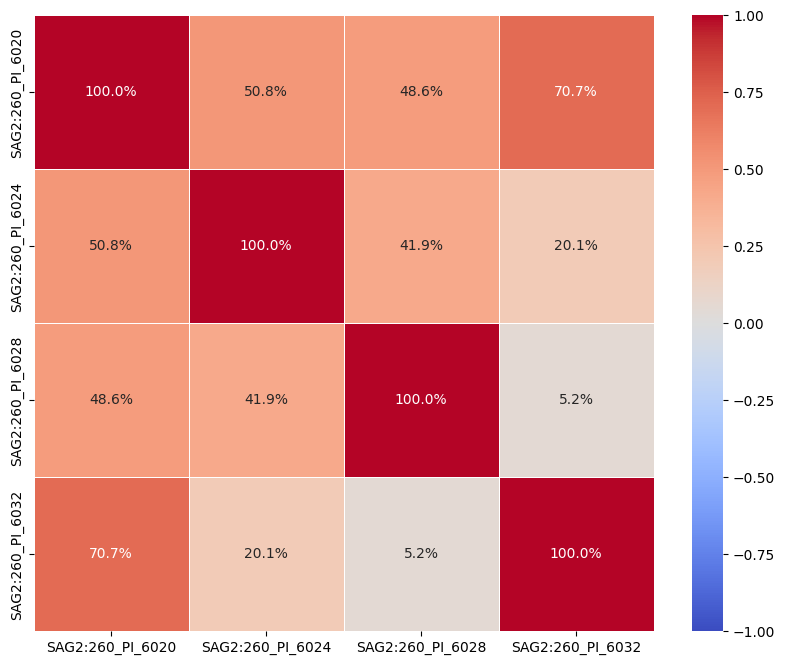

In [ ]:
columnas_interes = [
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",
]


Archivo_interes = Archivo[columnas_interes]


matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Presión descanso lado descarga SAG 2

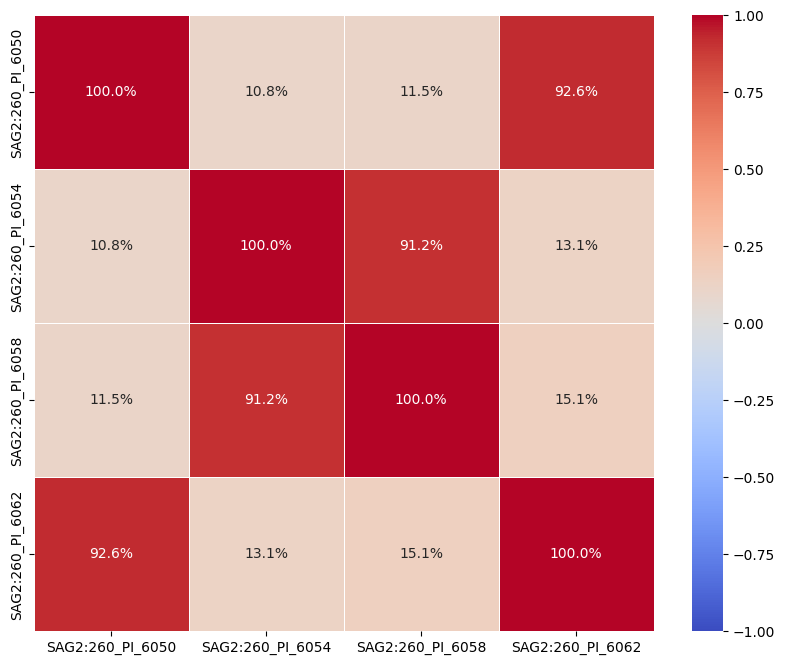

In [ ]:
columnas_interes = [
    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062"
]


Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Temperatura TK aceite alta presión (limpio)

Temperatura TK retorno aceite alta presión (sucio)

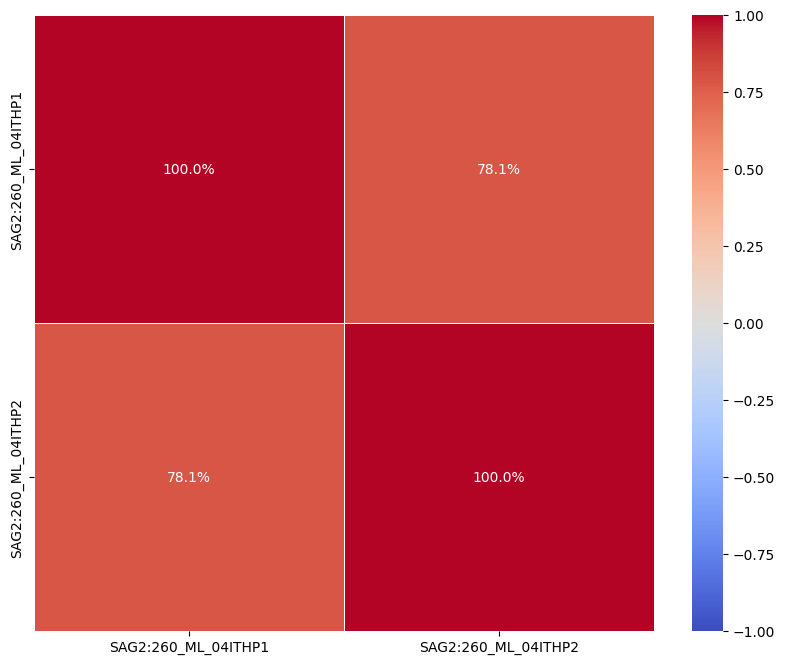

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITHP1",
    "SAG2:260_ML_04ITHP2"
]


Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()


Flujo aceite descanso lado alimentación SAG 2

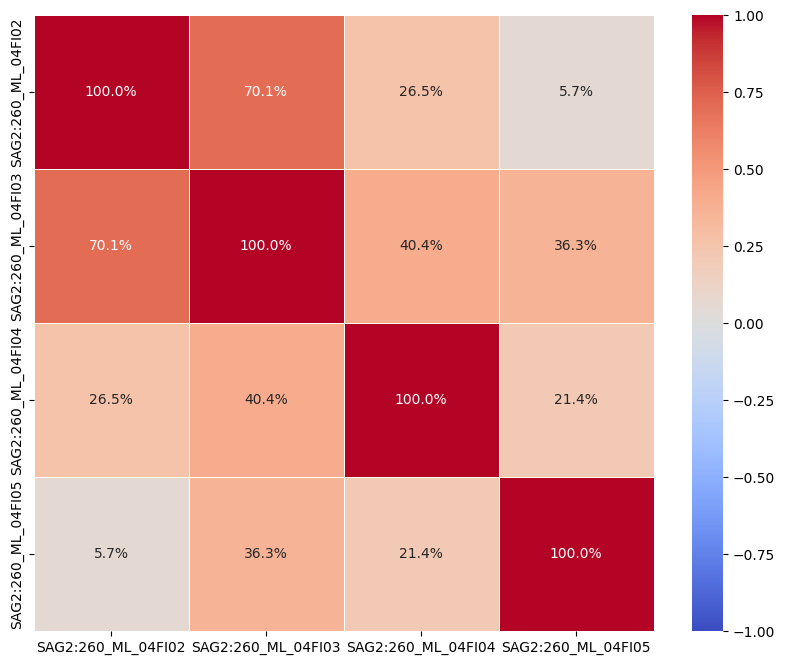

In [ ]:
columnas_interes = [
  "SAG2:260_ML_04FI02",
  "SAG2:260_ML_04FI03",
  "SAG2:260_ML_04FI04",
  "SAG2:260_ML_04FI05"
]


Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()


Flujo aceite descanso lado descarga SAG 2

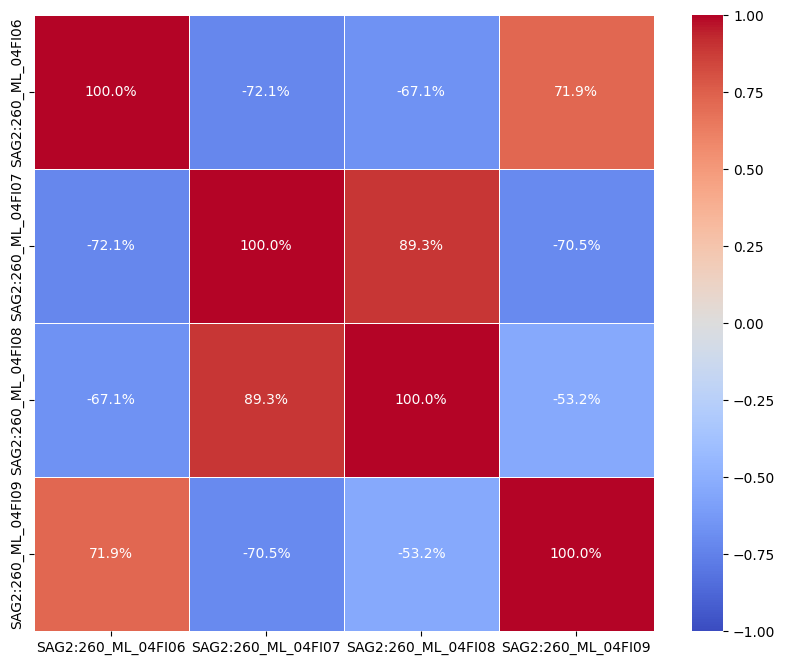

In [ ]:


columnas_interes = [
  "SAG2:260_ML_04FI06",
  "SAG2:260_ML_04FI07",
  "SAG2:260_ML_04FI08",
  "SAG2:260_ML_04FI09"
]


Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)
plt.title('')
plt.show()

Flujo aceite descanso P1 empu SAG 2

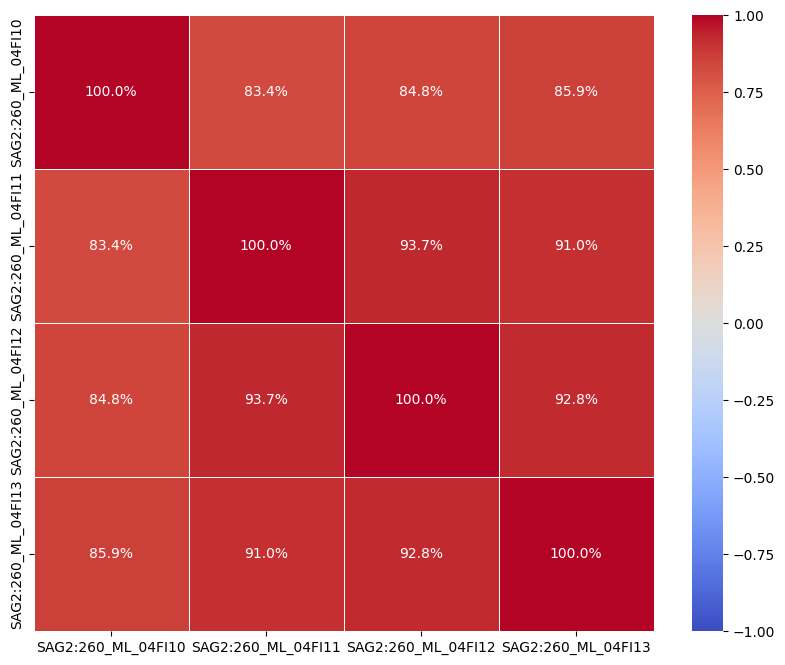

In [ ]:
columnas_interes = [
  "SAG2:260_ML_04FI10",
  "SAG2:260_ML_04FI11",
  "SAG2:260_ML_04FI12",
  "SAG2:260_ML_04FI13"
]


Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Temperatura agua enfriamiento retorno SAG 2

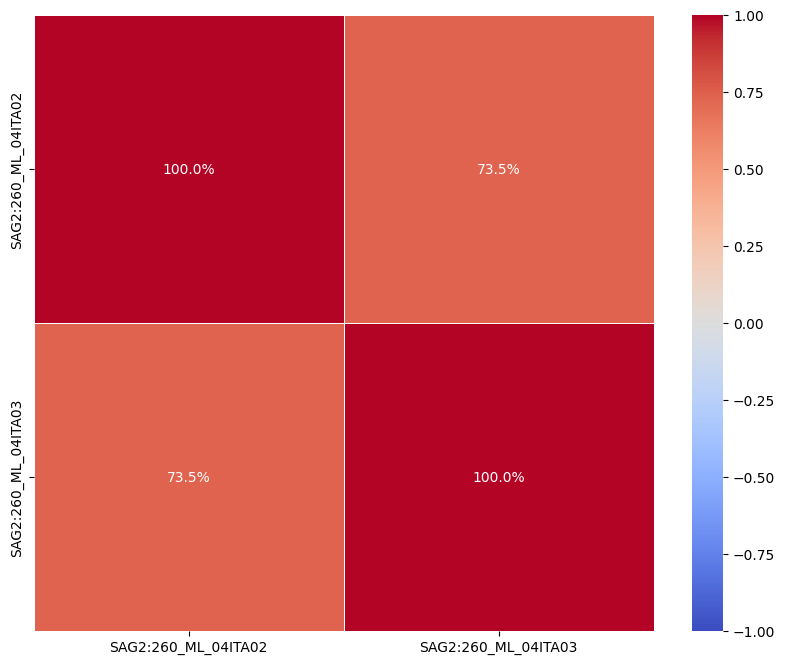

In [ ]:
columnas_interes = [
  "SAG2:260_ML_04ITA02",
  "SAG2:260_ML_04ITA03"

]


Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Temperatura 11 agua enfriamiento motor SAG 2

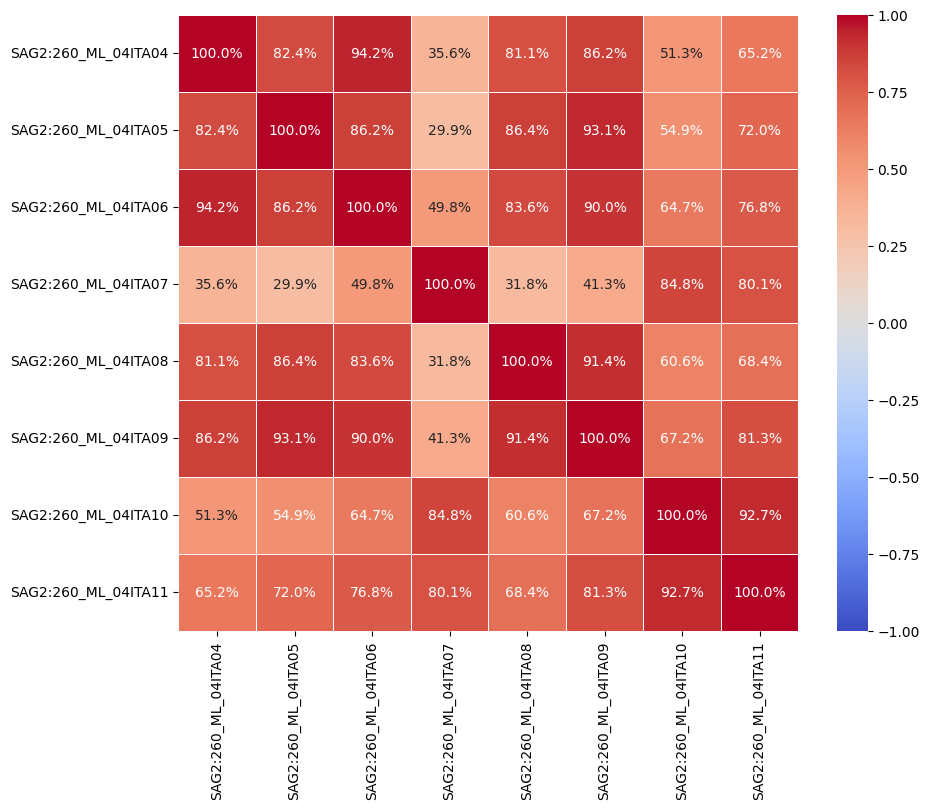

In [ ]:
columnas_interes = [
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11"

]

Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Temperatura descanso alimentación SAG 2

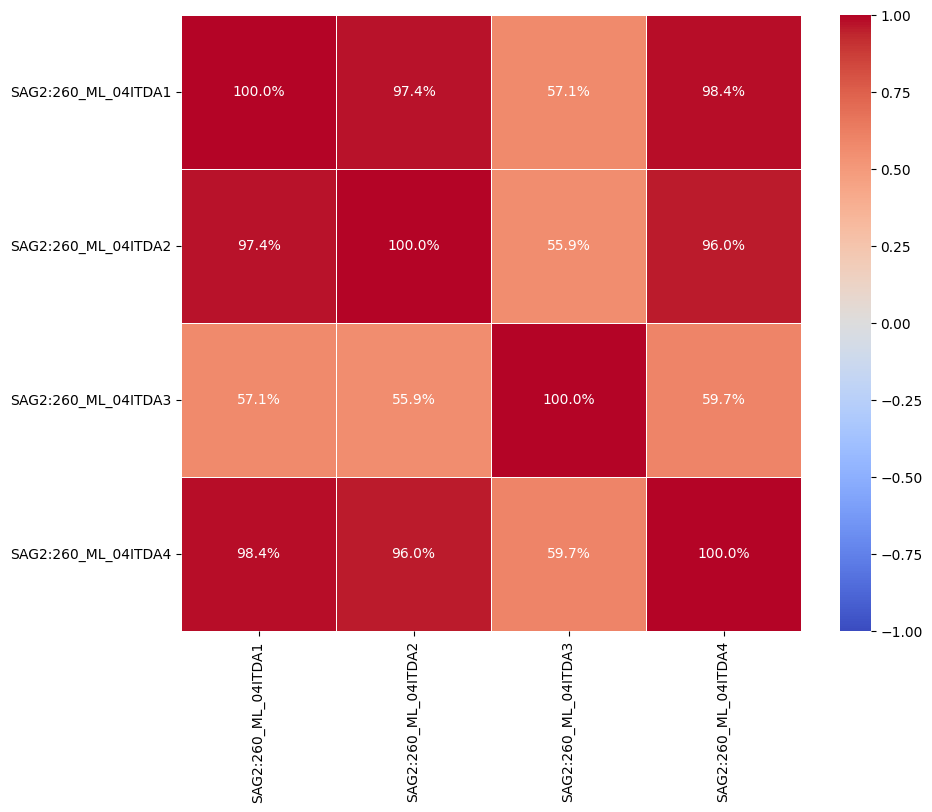

In [ ]:

columnas_interes = [
    "SAG2:260_ML_04ITDA1",
    "SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDA4"

]

Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Temperatura descanso descarga SAG 2

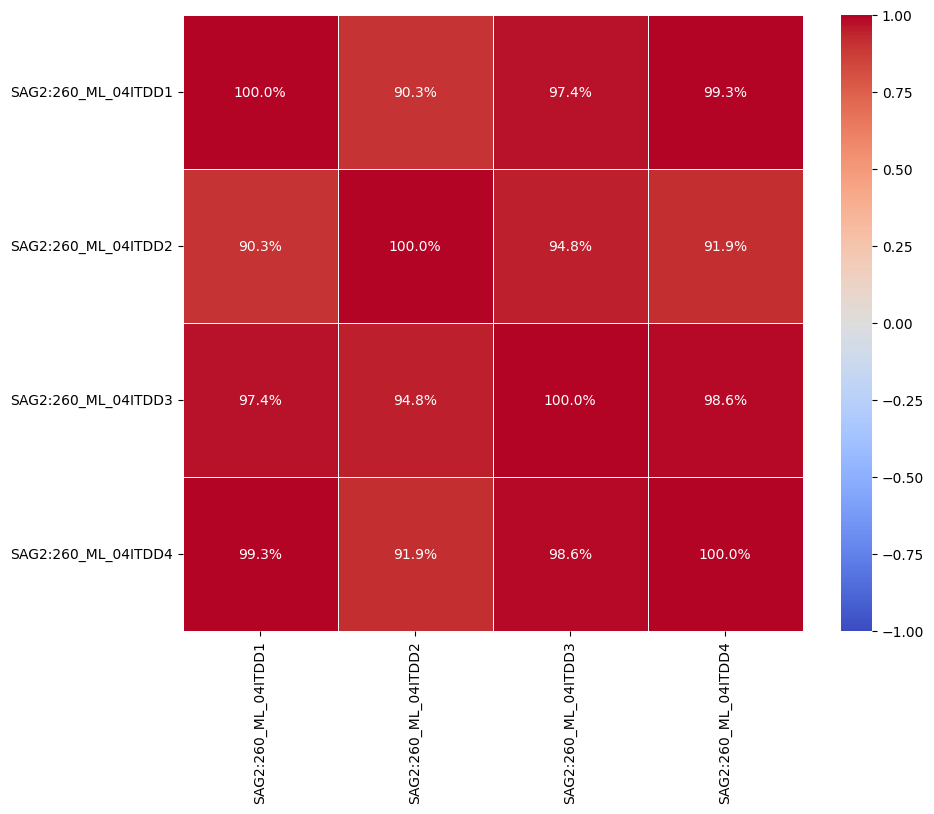

In [ ]:

columnas_interes = [
    "SAG2:260_ML_04ITDD1",
    "SAG2:260_ML_04ITDD2",
    "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4"

]

Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

Temperatura descanso EMP izquierdo SAG 2

Temperatura descanso EMP derecho SAG 2

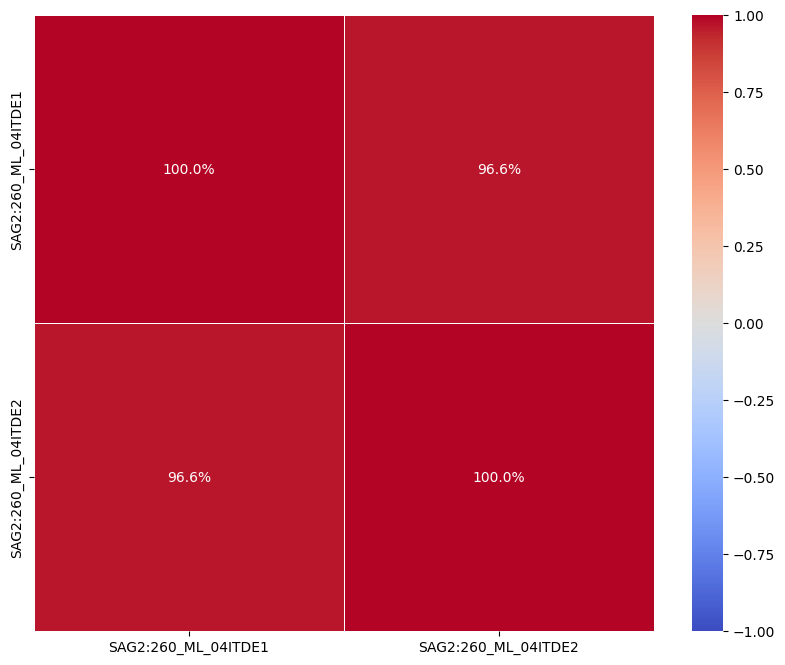

In [ ]:

columnas_interes = [
  "SAG2:260_ML_04ITDE1",
  "SAG2:260_ML_04ITDE2"

]

Archivo_interes = Archivo[columnas_interes]
matriz_correlacion = Archivo_interes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".1%",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.show()

isolate forest

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Cargar los datos desde el archivo CSV
data = pd.read_csv('pi_mdt_mtto_sag_15min_filtrado_interpolado.csv', parse_dates=["Fecha"])  # Asegurar que Fecha es tipo datetime

# Seleccionar las columnas de interés


columnas_interes = [
    #Presión descanso P1 lado alimentación SAG 2
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",

    #Presión descanso P1,P3,P4 lado descarga SAG 2
    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6062",

    #Temperatura TK aceite alta presión (limpio)
    "SAG2:260_ML_04ITHP1",

    #Flujo aceite descanso P1,P2,P3,P4 lado alimentación SAG 2
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",

    #Flujo aceite descanso P1,P2,P4 lado descarga SAG 2
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI09",

    #Flujo aceite descanso P1 empu SAG 2
    "SAG2:260_ML_04FI10",
    "SAG2:260_ML_04FI11",
    "SAG2:260_ML_04FI12",
    "SAG2:260_ML_04FI13",

    #Temperatura agua enfriamiento alimentación SAG 2
    "SAG2:260_ML_04ITA01",

    #Temperatura agua enfriamiento retorno SAG 2
    "SAG2:260_ML_04ITA02",

    #Temperatura agua enfriamiento motor SAG 2
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",

    #Temperatura descanso P1,P4 alimentación SAG 2
    "SAG2:260_ML_04ITDA1",
    "SAG2:260_ML_04ITDA4",

    #Temperatura descanso 1 descarga SAG 2
    "SAG2:260_ML_04ITDD1",
    "SAG2:260_ML_04ITDD2",
    "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4",

    #Temperatura descanso EMP izquierdo SAG 2
    #Temperatura descanso EMP derecho SAG 2
    "SAG2:260_ML_04ITDE1",
    "SAG2:260_ML_04ITDE2",




    #Temperatura descanso 1 descarga SAG 2
    "SAG2:260_ML_04ITDD1",

    "SAG2:260_MS_01",
    "SAG2:260_MS_04",
    "SAG2:260_MS_05",
    "SAG2:260_MS_06",
    "SAG2:260_MS_07",
    "SAG2:260_MS_08",
    "SAG2:260_MS_09",
    "SAG2:260_MS_10",


    # axuliares
    "SAG2:260_ML_04HS3",
    "SAG2:260_ML_04HS4",
    "SAG2:260_ML_04HS5",


    #motores g
    "SAG2:260_ML_04GAP0",
    "SAG2:260_ML_04GAP90",
    "SAG2:260_ML_04GAP180",
    "SAG2:260_ML_04GAP270",





]

# Seleccionar solo las columnas de interés
X = data[columnas_interes]

# Opción 2: Imputar valores NaN (rellenar con la media, mediana, etc.)
X_cleaned = X.fillna(X.mean())  # Rellena NaN con la media de cada columna

# Verificar si hay suficientes datos después de la limpieza
if X_cleaned.empty:
    raise ValueError("No hay datos válidos después de eliminar los valores NaN.")

# Entrenar el modelo de Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # Ajusta el parámetro de contaminación según sea necesario
model.fit(X_cleaned)

# Predecir anomalías
data['anomaly'] = 1  # Inicializar todas las filas como normales (1)
data.loc[X_cleaned.index, 'anomaly'] = model.predict(X_cleaned)  # Asignar predicciones solo a las filas limpias

# Filtrar las anomalías
anomalies = data[data['anomaly'] == -1]

# Guardar solo las fechas de anomalías en un CSV
anomalies[["Fecha"]].to_csv("fechas_anomalias1.csv", index=False)

print("Fechas de anomalías guardadas en 'fechas_anomalias1.csv'")

Fechas de anomalías guardadas en 'fechas_anomalias1.csv'


In [ ]:
import pandas as pd

# Cargar las fechas de anomalías detectadas desde el CSV
df_anomalias = pd.read_csv("fechas_anomalias1.csv", parse_dates=["Fecha"])


# Convertir "día-mes-año" (ignorar horas)
df_anomalias["Fecha"] = df_anomalias["Fecha"].dt.date

# Lista de fechas esperadas
fechas_esperadas = [
    "31-07-2024", "01-08-2024", "02-08-2024", "03-08-2024", "06-08-2024", "07-08-2024", "08-08-2024",
    "09-08-2024", "10-08-2024", "11-08-2024", "12-08-2024", "13-08-2024", "15-08-2024", "17-08-2024",
    "18-08-2024", "22-08-2024", "23-08-2024", "24-08-2024", "25-08-2024", "27-08-2024", "28-08-2024",
    "01-09-2024", "02-09-2024", "05-09-2024", "07-09-2024", "09-09-2024", "10-09-2024", "12-09-2024",
    "14-09-2024", "15-09-2024", "16-09-2024", "17-09-2024", "19-09-2024", "20-09-2024", "22-09-2024",
    "24-09-2024", "25-09-2024", "27-09-2024", "28-09-2024", "01-10-2024", "02-10-2024", "03-10-2024",
    "04-10-2024", "06-10-2024", "07-10-2024", "08-10-2024", "10-10-2024", "12-10-2024", "13-10-2024",
    "14-10-2024", "15-10-2024", "16-10-2024", "17-10-2024", "18-10-2024", "19-10-2024", "20-10-2024",
    "21-10-2024", "22-10-2024", "25-10-2024", "26-10-2024", "27-10-2024", "28-10-2024", "29-10-2024",
    "30-10-2024", "01-11-2024", "02-11-2024", "03-11-2024", "04-11-2024", "05-11-2024", "06-11-2024",
    "07-11-2024", "08-11-2024", "13-11-2024", "14-11-2024", "15-11-2024", "16-11-2024", "17-11-2024",
    "18-11-2024", "21-11-2024", "22-11-2024", "23-11-2024", "24-11-2024", "28-11-2024", "02-12-2024",
    "03-12-2024", "04-12-2024", "05-12-2024", "07-12-2024", "08-12-2024", "09-12-2024", "11-12-2024",
    "12-12-2024", "13-12-2024", "14-12-2024", "15-12-2024", "16-12-2024", "17-12-2024", "18-12-2024",
    "19-12-2024", "20-12-2024", "21-12-2024", "22-12-2024", "23-12-2024", "24-12-2024", "25-12-2024",
    "26-12-2024", "27-12-2024", "28-12-2024", "29-12-2024", "30-12-2024", "31-12-2024", "01-01-2025",
    "02-01-2025", "03-01-2025", "04-01-2025", "05-01-2025", "06-01-2025", "07-01-2025", "08-01-2025",
    "09-01-2025", "10-01-2025", "11-01-2025", "12-01-2025", "13-01-2025", "14-01-2025", "15-01-2025",
    "16-01-2025", "17-01-2025", "18-01-2025", "19-01-2025", "20-01-2025", "21-01-2025", "22-01-2025",
    "27-01-2025"
]

# Convertir fechas esperadas a objetos date
fechas_esperadas = pd.to_datetime(fechas_esperadas, format="%d-%m-%Y").date

# Fechas correctamente detectadas
aciertos = set(df_anomalias["Fecha"]) & set(fechas_esperadas)

# Fechas detectadas que no deberían estar (errores)
errores = set(df_anomalias["Fecha"]) - set(fechas_esperadas)

# Cálculo de métricas
total_esperadas = len(fechas_esperadas)
total_detectadas = len(df_anomalias)
total_aciertos = len(aciertos)
total_errores = len(errores)

# Calcular porcentaje de aciertos teniendo en cuenta errores
if total_detectadas > 0:
    porcentaje_aciertos = (total_aciertos / total_detectadas) * 100
else:
    porcentaje_aciertos = 0

print(f"\nPorcentaje de aciertos: {porcentaje_aciertos:.2f}%")
print(f"Total esperadas: {total_esperadas}")
print(f"Total detectadas: {total_detectadas}")
print(f"Total aciertos: {total_aciertos}")
print(f"Total errores: {total_errores}")



Porcentaje de aciertos: 2.35%
Total esperadas: 134
Total detectadas: 170
Total aciertos: 4
Total errores: 4


One-Class SVM

In [ ]:

df = pd.read_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", parse_dates=["Fecha"])

rbf

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import joblib


columnas_interes = [
    #Presión descanso lado alimentación SAG 2
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",

    #Presión descanso lado descarga SAG 2
    "SAG2:260_PI_6050",
    "SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062",

    #Temperatura TK aceite alta presión (limpio)
    "SAG2:260_ML_04ITHP1",
    #Temperatura TK retorno aceite alta presión (sucio)
    "SAG2:260_ML_04ITHP2",

    #Flujo aceite descanso lado alimentación SAG 2
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",

    #Flujo aceite descanso P1 lado descarga SAG 2
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09",

    #Flujo aceite descanso P1 empu SAG 2
    "SAG2:260_ML_04FI10",
    "SAG2:260_ML_04FI11",
    "SAG2:260_ML_04FI12",
    "SAG2:260_ML_04FI13",

    #Temperatura agua enfriamiento alimentación SAG 2
    "SAG2:260_ML_04ITA01",

    #Temperatura agua enfriamiento retorno SAG 2
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03",

    #Temperatura agua enfriamiento motor SAG 2
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",

    #Temperatura descanso 1 alimentación SAG 2
    "SAG2:260_ML_04ITDA1",
    #"SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    #"SAG2:260_ML_04ITDA4",


    #Temperatura descanso 1 descarga SAG 2
    "SAG2:260_ML_04ITDD1",
    "SAG2:260_ML_04ITDD2",
    "SAG2:260_ML_04ITDD3",
    "SAG2:260_ML_04ITDD4",

    #Temperatura descanso EMP izquierdo SAG 2
    "SAG2:260_ML_04ITDE1",

    #Temperatura descanso EMP derecho SAG 2
    "SAG2:260_ML_04ITDE2",

    # axuliares
    #Status sistema aceite alta presión (on/off)
    "SAG2:260_ML_04HS3",

    #Status sistema aceite auxiliares (on/off)
    "SAG2:260_ML_04HS4",
    "SAG2:260_ML_04HS5",


    #motores GAP 0O Motor gearless SAG
    "SAG2:260_ML_04GAP0",
    "SAG2:260_ML_04GAP90",
    "SAG2:260_ML_04GAP180",
    "SAG2:260_ML_04GAP270"


]


df_sensores = df[columnas_interes].dropna()  # Eliminar valores nulos
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sensores)

# Entrenar el modelo One-Class SVM
svm = OneClassSVM(kernel="rbf", gamma=0.05, nu=0.009)
svm.fit(X_scaled)

#-1 es anomalía 1 es normal
df = df.loc[df_sensores.index]
df["anomalia"] = svm.predict(X_scaled)
df_anomalias = df[df["anomalia"] == -1]


fechas_anomalias = df_anomalias["Fecha"]
print(fechas_anomalias)


df_anomalias[["Fecha"]].to_csv("fechas_anomalias_rbf.csv", index=False)
joblib.dump(svm, "modelo_svm_rbf.pkl")
joblib.dump(scaler, "scaler_rbf.pkl")

0       2025-01-27 12:00:00
11      2025-01-27 09:15:00
13      2025-01-27 08:45:00
17      2025-01-27 07:45:00
23      2025-01-27 06:15:00
                ...        
16715   2024-08-02 11:15:00
16732   2024-08-02 07:00:00
16748   2024-08-02 03:00:00
16787   2024-08-01 17:15:00
16790   2024-08-01 16:30:00
Name: Fecha, Length: 325, dtype: datetime64[ns]


['scaler_rbf.pkl']

In [ ]:
import pandas as pd

df_anomalias = pd.read_csv("fechas_anomalias_rbf.csv", parse_dates=["Fecha"])


# Convertir "día-mes-año" (ignorar horas) y eliminar duplicados
df_anomalias["Fecha"] = pd.to_datetime(df_anomalias["Fecha"]).dt.date
df_anomalias = df_anomalias.drop_duplicates(subset=["Fecha"])

# Lista de fechas esperadas
fechas_esperadas = [
    "01-01-2025", "01-08-2024", "01-09-2024", "01-10-2024", "01-11-2024", "02-01-2025", "02-08-2024",
    "02-09-2024", "02-10-2024", "02-11-2024", "02-12-2024", "03-01-2025", "03-08-2024", "03-10-2024",
    "03-11-2024", "03-12-2024", "04-01-2025", "04-10-2024", "04-11-2024", "04-12-2024", "05-01-2025",
    "05-09-2024", "05-11-2024", "05-12-2024", "06-01-2025", "06-08-2024", "06-10-2024", "06-11-2024",
    "07-01-2025", "07-08-2024", "07-09-2024", "07-10-2024", "07-11-2024", "07-12-2024", "08-01-2025",
    "08-08-2024", "08-10-2024", "08-11-2024", "08-12-2024", "09-01-2025", "09-08-2024", "09-09-2024",
    "09-12-2024", "10-01-2025", "10-08-2024", "10-09-2024", "10-10-2024", "11-01-2025", "11-03-2025",
    "11-08-2024", "11-10-2024", "11-12-2024", "12-01-2025", "12-08-2024", "12-09-2024", "12-10-2024",
    "12-12-2024", "13-01-2025", "13-08-2024", "13-10-2024", "13-11-2024", "13-12-2024", "14-01-2025",
    "14-09-2024", "14-10-2024", "14-11-2024", "14-12-2024", "15-01-2025", "15-08-2024", "15-09-2024",
    "15-10-2024", "15-11-2024", "15-12-2024", "16-01-2025", "16-09-2024", "16-10-2024", "16-11-2024",
    "16-12-2024", "17-01-2025", "17-08-2024", "17-09-2024", "17-10-2024", "17-11-2024", "17-12-2024",
    "18-01-2025", "18-08-2024", "18-10-2024", "18-11-2024", "18-12-2024", "19-01-2025", "19-09-2024",
    "19-10-2024", "19-12-2024", "20-01-2025", "20-09-2024", "20-10-2024", "20-12-2024", "21-10-2024",
    "21-11-2024", "21-12-2024", "22-08-2024", "22-10-2024", "22-11-2024", "22-12-2024", "23-08-2024",
    "23-11-2024", "23-12-2024", "24-08-2024", "24-09-2024", "24-12-2024", "25-08-2024", "25-09-2024",
    "25-10-2024", "25-12-2024", "26-10-2024", "26-12-2024", "27-01-2025", "27-08-2024", "27-09-2024",
    "27-10-2024", "27-12-2024", "28-08-2024", "28-09-2024", "28-10-2024", "28-11-2024", "28-12-2024",
    "29-10-2024", "29-12-2024", "30-10-2024", "30-12-2024", "31-07-2024", "31-12-2024"
]

# Convertir fechas esperadas a objetos date y eliminar duplicados
fechas_esperadas = sorted(set(pd.to_datetime(fechas_esperadas, format="%d-%m-%Y").date))

# Fechas correctamente detectadas
aciertos = set(df_anomalias["Fecha"]) & set(fechas_esperadas)

# Fechas detectadas que no deberían estar (errores)
errores = set(df_anomalias["Fecha"]) - set(fechas_esperadas)

# Cálculo de métricas
total_esperadas = len(fechas_esperadas)
total_detectadas = len(df_anomalias)
total_aciertos = len(aciertos)
total_errores = len(errores)

# Calcular porcentaje de aciertos teniendo en cuenta errores
if total_detectadas > 0:
    porcentaje_aciertos = (total_aciertos / total_detectadas) * 100
else:
    porcentaje_aciertos = 0

print(f"\nPorcentaje de aciertos: {porcentaje_aciertos:.2f}%")
print(f"Total esperadas: {total_esperadas}")
print(f"Total detectadas: {total_detectadas}")
print(f"Total aciertos: {total_aciertos}")
print(f"Total errores: {total_errores}")



Porcentaje de aciertos: 78.21%
Total esperadas: 132
Total detectadas: 78
Total aciertos: 61
Total errores: 17


lineal

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import joblib

columnas_interes = [
    #Presión descanso lado alimentación SAG 2
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",

    #Presión descanso lado descarga SAG 2
    #"SAG2:260_PI_6050",
    #"SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062",

    #Temperatura TK aceite alta presión (limpio)
    "SAG2:260_ML_04ITHP1",
    #Temperatura TK retorno aceite alta presión (sucio)
    "SAG2:260_ML_04ITHP2",

    #Flujo aceite descanso lado alimentación SAG 2
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",

    #Flujo aceite descanso P1 lado descarga SAG 2
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09",

    #Flujo aceite descanso P1 empu SAG 2
    "SAG2:260_ML_04FI10",
    #"SAG2:260_ML_04FI11",
    #"SAG2:260_ML_04FI12",
    #"SAG2:260_ML_04FI13",

    #Temperatura agua enfriamiento alimentación SAG 2
    "SAG2:260_ML_04ITA01",

    #Temperatura agua enfriamiento retorno SAG 2
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03",

    #Temperatura agua enfriamiento motor SAG 2
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",

    #Temperatura descanso 1 alimentación SAG 2
    "SAG2:260_ML_04ITDA1",
    #"SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    #"SAG2:260_ML_04ITDA4",


    #Temperatura descanso 1 descarga SAG 2
    "SAG2:260_ML_04ITDD1",
    #"SAG2:260_ML_04ITDD2",
    #"SAG2:260_ML_04ITDD3",
    #"SAG2:260_ML_04ITDD4",

    #Temperatura descanso EMP izquierdo SAG 2
    "SAG2:260_ML_04ITDE1",

    #Temperatura descanso EMP derecho SAG 2
    #"SAG2:260_ML_04ITDE2",

    # axuliares
    #Status sistema aceite alta presión (on/off)
    "SAG2:260_ML_04HS3",

    #Status sistema aceite auxiliares (on/off)
    "SAG2:260_ML_04HS4",
    "SAG2:260_ML_04HS5",


    #motores GAP 0O Motor gearless SAG
    "SAG2:260_ML_04GAP0",
    "SAG2:260_ML_04GAP90",
    "SAG2:260_ML_04GAP180",
    "SAG2:260_ML_04GAP270"


]


df_sensores = df[columnas_interes].dropna()  # Eliminar valores nulos
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sensores)

# Entrenar el modelo One-Class SVM
ssvm = OneClassSVM(kernel="linear", nu=0.009)  # Cambiar a kernel lineal
svm.fit(X_scaled)

#-1 es anomalía 1 es normal
df = df.loc[df_sensores.index]
df["anomalia"] = svm.predict(X_scaled)
df_anomalias = df[df["anomalia"] == -1]


fechas_anomalias = df_anomalias["Fecha"]
print(fechas_anomalias)


df_anomalias[["Fecha"]].to_csv("fechas_anomalias_lineal.csv", index=False)
joblib.dump(svm, "modelo_svm_lineal.pkl")
joblib.dump(scaler, "scaler_lineal.pkl")

11      2025-01-27 09:15:00
13      2025-01-27 08:45:00
17      2025-01-27 07:45:00
121     2025-01-24 03:45:00
123     2025-01-24 03:15:00
                ...        
16699   2024-08-02 15:15:00
16701   2024-08-02 14:45:00
16702   2024-08-02 14:30:00
16713   2024-08-02 11:45:00
16751   2024-08-02 02:15:00
Name: Fecha, Length: 279, dtype: datetime64[ns]


['scaler_lineal.pkl']

In [ ]:
import pandas as pd

# Cargar datos
df_anomalias = pd.read_csv("fechas_anomalias_lineal.csv", parse_dates=["Fecha"])
# Convertir "día-mes-año" (ignorar horas) y eliminar duplicados
df_anomalias["Fecha"] = pd.to_datetime(df_anomalias["Fecha"]).dt.date
df_anomalias = df_anomalias.drop_duplicates(subset=["Fecha"])

# Lista de fechas esperadas
fechas_esperadas = [
    "01-01-2025", "01-08-2024", "01-09-2024", "01-10-2024", "01-11-2024", "02-01-2025", "02-08-2024",
    "02-09-2024", "02-10-2024", "02-11-2024", "02-12-2024", "03-01-2025", "03-08-2024", "03-10-2024",
    "03-11-2024", "03-12-2024", "04-01-2025", "04-10-2024", "04-11-2024", "04-12-2024", "05-01-2025",
    "05-09-2024", "05-11-2024", "05-12-2024", "06-01-2025", "06-08-2024", "06-10-2024", "06-11-2024",
    "07-01-2025", "07-08-2024", "07-09-2024", "07-10-2024", "07-11-2024", "07-12-2024", "08-01-2025",
    "08-08-2024", "08-10-2024", "08-11-2024", "08-12-2024", "09-01-2025", "09-08-2024", "09-09-2024",
    "09-12-2024", "10-01-2025", "10-08-2024", "10-09-2024", "10-10-2024", "11-01-2025", "11-03-2025",
    "11-08-2024", "11-10-2024", "11-12-2024", "12-01-2025", "12-08-2024", "12-09-2024", "12-10-2024",
    "12-12-2024", "13-01-2025", "13-08-2024", "13-10-2024", "13-11-2024", "13-12-2024", "14-01-2025",
    "14-09-2024", "14-10-2024", "14-11-2024", "14-12-2024", "15-01-2025", "15-08-2024", "15-09-2024",
    "15-10-2024", "15-11-2024", "15-12-2024", "16-01-2025", "16-09-2024", "16-10-2024", "16-11-2024",
    "16-12-2024", "17-01-2025", "17-08-2024", "17-09-2024", "17-10-2024", "17-11-2024", "17-12-2024",
    "18-01-2025", "18-08-2024", "18-10-2024", "18-11-2024", "18-12-2024", "19-01-2025", "19-09-2024",
    "19-10-2024", "19-12-2024", "20-01-2025", "20-09-2024", "20-10-2024", "20-12-2024", "21-10-2024",
    "21-11-2024", "21-12-2024", "22-08-2024", "22-10-2024", "22-11-2024", "22-12-2024", "23-08-2024",
    "23-11-2024", "23-12-2024", "24-08-2024", "24-09-2024", "24-12-2024", "25-08-2024", "25-09-2024",
    "25-10-2024", "25-12-2024", "26-10-2024", "26-12-2024", "27-01-2025", "27-08-2024", "27-09-2024",
    "27-10-2024", "27-12-2024", "28-08-2024", "28-09-2024", "28-10-2024", "28-11-2024", "28-12-2024",
    "29-10-2024", "29-12-2024", "30-10-2024", "30-12-2024", "31-07-2024", "31-12-2024"
]

# Convertir fechas esperadas a objetos date y eliminar duplicados
fechas_esperadas = sorted(set(pd.to_datetime(fechas_esperadas, format="%d-%m-%Y").date))

# Fechas correctamente detectadas
aciertos = set(df_anomalias["Fecha"]) & set(fechas_esperadas)

# Fechas detectadas que no deberían estar (errores)
errores = set(df_anomalias["Fecha"]) - set(fechas_esperadas)

# Cálculo de métricas
total_esperadas = len(fechas_esperadas)
total_detectadas = len(df_anomalias)
total_aciertos = len(aciertos)
total_errores = len(errores)

# Calcular porcentaje de aciertos teniendo en cuenta errores
if total_detectadas > 0:
    porcentaje_aciertos = (total_aciertos / total_detectadas) * 100
else:
    porcentaje_aciertos = 0

print(f"\nPorcentaje de aciertos: {porcentaje_aciertos:.2f}%")
print(f"Total esperadas: {total_esperadas}")
print(f"Total detectadas: {total_detectadas}")
print(f"Total aciertos: {total_aciertos}")
print(f"Total errores: {total_errores}")




Porcentaje de aciertos: 75.00%
Total esperadas: 132
Total detectadas: 68
Total aciertos: 51
Total errores: 17


polinómico

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import joblib

columnas_interes = [
    #Presión descanso lado alimentación SAG 2
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",

    #Presión descanso lado descarga SAG 2
    #"SAG2:260_PI_6050",
    #"SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062",

    #Temperatura TK aceite alta presión (limpio)
    "SAG2:260_ML_04ITHP1",
    #Temperatura TK retorno aceite alta presión (sucio)
    "SAG2:260_ML_04ITHP2",

    #Flujo aceite descanso lado alimentación SAG 2
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",

    #Flujo aceite descanso P1 lado descarga SAG 2
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09",

    #Flujo aceite descanso P1 empu SAG 2
    "SAG2:260_ML_04FI10",
    #"SAG2:260_ML_04FI11",
    #"SAG2:260_ML_04FI12",
    #"SAG2:260_ML_04FI13",

    #Temperatura agua enfriamiento alimentación SAG 2
    "SAG2:260_ML_04ITA01",

    #Temperatura agua enfriamiento retorno SAG 2
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03",

    #Temperatura agua enfriamiento motor SAG 2
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",

    #Temperatura descanso 1 alimentación SAG 2
    "SAG2:260_ML_04ITDA1",
    #"SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    #"SAG2:260_ML_04ITDA4",


    #Temperatura descanso 1 descarga SAG 2
    "SAG2:260_ML_04ITDD1",
    #"SAG2:260_ML_04ITDD2",
    #"SAG2:260_ML_04ITDD3",
    #"SAG2:260_ML_04ITDD4",

    #Temperatura descanso EMP izquierdo SAG 2
    "SAG2:260_ML_04ITDE1",

    #Temperatura descanso EMP derecho SAG 2
    #"SAG2:260_ML_04ITDE2",

    # axuliares
    #Status sistema aceite alta presión (on/off)
    "SAG2:260_ML_04HS3",

    #Status sistema aceite auxiliares (on/off)
    "SAG2:260_ML_04HS4",
    "SAG2:260_ML_04HS5",


    #motores GAP 0O Motor gearless SAG
    "SAG2:260_ML_04GAP0",
    "SAG2:260_ML_04GAP90",
    "SAG2:260_ML_04GAP180",
    "SAG2:260_ML_04GAP270"


]


df_sensores = df[columnas_interes].dropna()  # Eliminar valores nulos
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sensores)

# Entrenar el modelo One-Class SVM
svm = OneClassSVM(kernel="poly", gamma=0.05, nu=0.01, degree=0)
svm.fit(X_scaled)

#-1 es anomalía 1 es normal
df = df.loc[df_sensores.index]
df["anomalia"] = svm.predict(X_scaled)
df_anomalias = df[df["anomalia"] == -1]


fechas_anomalias = df_anomalias["Fecha"]
print(fechas_anomalias)


df_anomalias[["Fecha"]].to_csv("fechas_anomalias_polinómico.csv", index=False)
joblib.dump(svm, "modelo_svm_polinómico.pkl")
joblib.dump(scaler, "scaler_polinómico.pkl")

0       2025-01-27 12:00:00
1       2025-01-27 11:45:00
2       2025-01-27 11:30:00
3       2025-01-27 11:15:00
4       2025-01-27 11:00:00
                ...        
16948   2024-07-31 01:00:00
16949   2024-07-31 00:45:00
16950   2024-07-31 00:30:00
16951   2024-07-31 00:15:00
16952   2024-07-31 00:00:00
Name: Fecha, Length: 16953, dtype: datetime64[ns]


['scaler_polinómico.pkl']

In [ ]:
import pandas as pd

# Cargar datos
df_anomalias = pd.read_csv("fechas_anomalias_polinómico.csv", parse_dates=["Fecha"])

# Convertir "día-mes-año" (ignorar horas) y eliminar duplicados
df_anomalias["Fecha"] = pd.to_datetime(df_anomalias["Fecha"]).dt.date
df_anomalias = df_anomalias.drop_duplicates(subset=["Fecha"])

# Lista de fechas esperadas
fechas_esperadas = [
    "01-01-2025", "01-08-2024", "01-09-2024", "01-10-2024", "01-11-2024", "02-01-2025", "02-08-2024",
    "02-09-2024", "02-10-2024", "02-11-2024", "02-12-2024", "03-01-2025", "03-08-2024", "03-10-2024",
    "03-11-2024", "03-12-2024", "04-01-2025", "04-10-2024", "04-11-2024", "04-12-2024", "05-01-2025",
    "05-09-2024", "05-11-2024", "05-12-2024", "06-01-2025", "06-08-2024", "06-10-2024", "06-11-2024",
    "07-01-2025", "07-08-2024", "07-09-2024", "07-10-2024", "07-11-2024", "07-12-2024", "08-01-2025",
    "08-08-2024", "08-10-2024", "08-11-2024", "08-12-2024", "09-01-2025", "09-08-2024", "09-09-2024",
    "09-12-2024", "10-01-2025", "10-08-2024", "10-09-2024", "10-10-2024", "11-01-2025", "11-03-2025",
    "11-08-2024", "11-10-2024", "11-12-2024", "12-01-2025", "12-08-2024", "12-09-2024", "12-10-2024",
    "12-12-2024", "13-01-2025", "13-08-2024", "13-10-2024", "13-11-2024", "13-12-2024", "14-01-2025",
    "14-09-2024", "14-10-2024", "14-11-2024", "14-12-2024", "15-01-2025", "15-08-2024", "15-09-2024",
    "15-10-2024", "15-11-2024", "15-12-2024", "16-01-2025", "16-09-2024", "16-10-2024", "16-11-2024",
    "16-12-2024", "17-01-2025", "17-08-2024", "17-09-2024", "17-10-2024", "17-11-2024", "17-12-2024",
    "18-01-2025", "18-08-2024", "18-10-2024", "18-11-2024", "18-12-2024", "19-01-2025", "19-09-2024",
    "19-10-2024", "19-12-2024", "20-01-2025", "20-09-2024", "20-10-2024", "20-12-2024", "21-10-2024",
    "21-11-2024", "21-12-2024", "22-08-2024", "22-10-2024", "22-11-2024", "22-12-2024", "23-08-2024",
    "23-11-2024", "23-12-2024", "24-08-2024", "24-09-2024", "24-12-2024", "25-08-2024", "25-09-2024",
    "25-10-2024", "25-12-2024", "26-10-2024", "26-12-2024", "27-01-2025", "27-08-2024", "27-09-2024",
    "27-10-2024", "27-12-2024", "28-08-2024", "28-09-2024", "28-10-2024", "28-11-2024", "28-12-2024",
    "29-10-2024", "29-12-2024", "30-10-2024", "30-12-2024", "31-07-2024", "31-12-2024"
]

# Convertir fechas esperadas a objetos date y eliminar duplicados
fechas_esperadas = sorted(set(pd.to_datetime(fechas_esperadas, format="%d-%m-%Y").date))

# Fechas correctamente detectadas
aciertos = set(df_anomalias["Fecha"]) & set(fechas_esperadas)

# Fechas detectadas que no deberían estar (errores)
errores = set(df_anomalias["Fecha"]) - set(fechas_esperadas)

# Cálculo de métricas
total_esperadas = len(fechas_esperadas)
total_detectadas = len(df_anomalias)
total_aciertos = len(aciertos)
total_errores = len(errores)

# Calcular porcentaje de aciertos teniendo en cuenta errores
if total_detectadas > 0:
    porcentaje_aciertos = (total_aciertos / total_detectadas) * 100
else:
    porcentaje_aciertos = 0

print(f"\nPorcentaje de aciertos: {porcentaje_aciertos:.2f}%")
print(f"Total esperadas: {total_esperadas}")
print(f"Total detectadas: {total_detectadas}")
print(f"Total aciertos: {total_aciertos}")
print(f"Total errores: {total_errores}")



Porcentaje de aciertos: 73.18%
Total esperadas: 132
Total detectadas: 179
Total aciertos: 131
Total errores: 48


Sigmoide

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import joblib

columnas_interes = [
    #Presión descanso lado alimentación SAG 2
    "SAG2:260_PI_6020",
    "SAG2:260_PI_6024",
    "SAG2:260_PI_6028",
    "SAG2:260_PI_6032",

    #Presión descanso lado descarga SAG 2
    #"SAG2:260_PI_6050",
    #"SAG2:260_PI_6054",
    "SAG2:260_PI_6058",
    "SAG2:260_PI_6062",

    #Temperatura TK aceite alta presión (limpio)
    "SAG2:260_ML_04ITHP1",
    #Temperatura TK retorno aceite alta presión (sucio)
    "SAG2:260_ML_04ITHP2",

    #Flujo aceite descanso lado alimentación SAG 2
    "SAG2:260_ML_04FI02",
    "SAG2:260_ML_04FI03",
    "SAG2:260_ML_04FI04",
    "SAG2:260_ML_04FI05",

    #Flujo aceite descanso P1 lado descarga SAG 2
    "SAG2:260_ML_04FI06",
    "SAG2:260_ML_04FI07",
    "SAG2:260_ML_04FI08",
    "SAG2:260_ML_04FI09",

    #Flujo aceite descanso P1 empu SAG 2
    "SAG2:260_ML_04FI10",
    #"SAG2:260_ML_04FI11",
    #"SAG2:260_ML_04FI12",
    #"SAG2:260_ML_04FI13",

    #Temperatura agua enfriamiento alimentación SAG 2
    "SAG2:260_ML_04ITA01",

    #Temperatura agua enfriamiento retorno SAG 2
    "SAG2:260_ML_04ITA02",
    "SAG2:260_ML_04ITA03",

    #Temperatura agua enfriamiento motor SAG 2
    "SAG2:260_ML_04ITA04",
    "SAG2:260_ML_04ITA05",
    "SAG2:260_ML_04ITA06",
    "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08",
    "SAG2:260_ML_04ITA09",
    "SAG2:260_ML_04ITA10",
    "SAG2:260_ML_04ITA11",

    #Temperatura descanso 1 alimentación SAG 2
    "SAG2:260_ML_04ITDA1",
    #"SAG2:260_ML_04ITDA2",
    "SAG2:260_ML_04ITDA3",
    #"SAG2:260_ML_04ITDA4",


    #Temperatura descanso 1 descarga SAG 2
    "SAG2:260_ML_04ITDD1",
    #"SAG2:260_ML_04ITDD2",
    #"SAG2:260_ML_04ITDD3",
    #"SAG2:260_ML_04ITDD4",

    #Temperatura descanso EMP izquierdo SAG 2
    "SAG2:260_ML_04ITDE1",

    #Temperatura descanso EMP derecho SAG 2
    #"SAG2:260_ML_04ITDE2",

    # axuliares
    #Status sistema aceite alta presión (on/off)
    "SAG2:260_ML_04HS3",

    #Status sistema aceite auxiliares (on/off)
    "SAG2:260_ML_04HS4",
    "SAG2:260_ML_04HS5",


    #motores GAP 0O Motor gearless SAG
    "SAG2:260_ML_04GAP0",
    "SAG2:260_ML_04GAP90",
    "SAG2:260_ML_04GAP180",
    "SAG2:260_ML_04GAP270"


]


df_sensores = df[columnas_interes].dropna()  # Eliminar valores nulos
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sensores)

# Entrenar el modelo One-Class SVM
svm = OneClassSVM(kernel="sigmoid", gamma=0.05, nu=0.01)
svm.fit(X_scaled)

#-1 es anomalía 1 es normal
df = df.loc[df_sensores.index]
df["anomalia"] = svm.predict(X_scaled)
df_anomalias = df[df["anomalia"] == -1]


fechas_anomalias = df_anomalias["Fecha"]
print(fechas_anomalias)


df_anomalias[["Fecha"]].to_csv("fechas_anomalias_sigmoide.csv", index=False)
joblib.dump(svm, "modelo_svm_sigmoide.pkl")
joblib.dump(scaler, "scaler_sigmoide.pkl")

122     2025-01-24 03:30:00
123     2025-01-24 03:15:00
124     2025-01-24 03:00:00
125     2025-01-24 02:45:00
126     2025-01-24 02:30:00
                ...        
15123   2024-08-19 01:15:00
15124   2024-08-19 01:00:00
15125   2024-08-19 00:45:00
16700   2024-08-02 15:00:00
16701   2024-08-02 14:45:00
Name: Fecha, Length: 169, dtype: datetime64[ns]


['scaler_sigmoide.pkl']

In [ ]:
import pandas as pd

df_anomalias = pd.read_csv("fechas_anomalias_sigmoide.csv", parse_dates=["Fecha"])

# Convertir "día-mes-año" (ignorar horas) y eliminar duplicados
df_anomalias["Fecha"] = pd.to_datetime(df_anomalias["Fecha"]).dt.date
df_anomalias = df_anomalias.drop_duplicates(subset=["Fecha"])

# Lista de fechas esperadas
fechas_esperadas = [
    "01-01-2025", "01-08-2024", "01-09-2024", "01-10-2024", "01-11-2024", "02-01-2025", "02-08-2024",
    "02-09-2024", "02-10-2024", "02-11-2024", "02-12-2024", "03-01-2025", "03-08-2024", "03-10-2024",
    "03-11-2024", "03-12-2024", "04-01-2025", "04-10-2024", "04-11-2024", "04-12-2024", "05-01-2025",
    "05-09-2024", "05-11-2024", "05-12-2024", "06-01-2025", "06-08-2024", "06-10-2024", "06-11-2024",
    "07-01-2025", "07-08-2024", "07-09-2024", "07-10-2024", "07-11-2024", "07-12-2024", "08-01-2025",
    "08-08-2024", "08-10-2024", "08-11-2024", "08-12-2024", "09-01-2025", "09-08-2024", "09-09-2024",
    "09-12-2024", "10-01-2025", "10-08-2024", "10-09-2024", "10-10-2024", "11-01-2025", "11-03-2025",
    "11-08-2024", "11-10-2024", "11-12-2024", "12-01-2025", "12-08-2024", "12-09-2024", "12-10-2024",
    "12-12-2024", "13-01-2025", "13-08-2024", "13-10-2024", "13-11-2024", "13-12-2024", "14-01-2025",
    "14-09-2024", "14-10-2024", "14-11-2024", "14-12-2024", "15-01-2025", "15-08-2024", "15-09-2024",
    "15-10-2024", "15-11-2024", "15-12-2024", "16-01-2025", "16-09-2024", "16-10-2024", "16-11-2024",
    "16-12-2024", "17-01-2025", "17-08-2024", "17-09-2024", "17-10-2024", "17-11-2024", "17-12-2024",
    "18-01-2025", "18-08-2024", "18-10-2024", "18-11-2024", "18-12-2024", "19-01-2025", "19-09-2024",
    "19-10-2024", "19-12-2024", "20-01-2025", "20-09-2024", "20-10-2024", "20-12-2024", "21-10-2024",
    "21-11-2024", "21-12-2024", "22-08-2024", "22-10-2024", "22-11-2024", "22-12-2024", "23-08-2024",
    "23-11-2024", "23-12-2024", "24-08-2024", "24-09-2024", "24-12-2024", "25-08-2024", "25-09-2024",
    "25-10-2024", "25-12-2024", "26-10-2024", "26-12-2024", "27-01-2025", "27-08-2024", "27-09-2024",
    "27-10-2024", "27-12-2024", "28-08-2024", "28-09-2024", "28-10-2024", "28-11-2024", "28-12-2024",
    "29-10-2024", "29-12-2024", "30-10-2024", "30-12-2024", "31-07-2024", "31-12-2024"
]

# Convertir fechas esperadas a objetos date y eliminar duplicados
fechas_esperadas = sorted(set(pd.to_datetime(fechas_esperadas, format="%d-%m-%Y").date))

# Fechas correctamente detectadas
aciertos = set(df_anomalias["Fecha"]) & set(fechas_esperadas)

# Fechas detectadas que no deberían estar (errores)
errores = set(df_anomalias["Fecha"]) - set(fechas_esperadas)

# Cálculo de métricas
total_esperadas = len(fechas_esperadas)
total_detectadas = len(df_anomalias)
total_aciertos = len(aciertos)
total_errores = len(errores)

# Calcular porcentaje de aciertos teniendo en cuenta errores
if total_detectadas > 0:
    porcentaje_aciertos = (total_aciertos / total_detectadas) * 100
else:
    porcentaje_aciertos = 0

print(f"\nPorcentaje de aciertos: {porcentaje_aciertos:.2f}%")
print(f"Total esperadas: {total_esperadas}")
print(f"Total detectadas: {total_detectadas}")
print(f"Total aciertos: {total_aciertos}")
print(f"Total errores: {total_errores}")


Porcentaje de aciertos: 72.41%
Total esperadas: 132
Total detectadas: 29
Total aciertos: 21
Total errores: 8


Comparaciones


Resumen de comparación entre métodos:
       Método  Detectadas  Aciertos  Errores  Porcentaje de aciertos
0         RBF          78        61       17                  78.205
1      Lineal          68        51       17                  75.000
2  Polinómico         179       131       48                  73.184
3    Sigmoide          29        21        8                  72.414


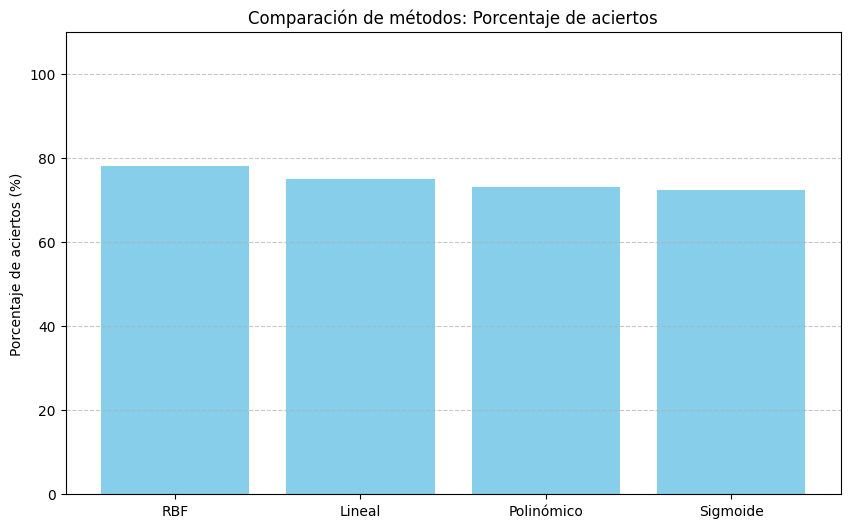

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con nombre del método y su archivo asociado
archivos = {
    "RBF": "fechas_anomalias_rbf.csv",
    "Lineal": "fechas_anomalias_lineal.csv",
    "Polinómico": "fechas_anomalias_polinómico.csv",
    "Sigmoide": "fechas_anomalias_sigmoide.csv"
}

# Lista de fechas esperadas
fechas_esperadas = [
    "01-01-2025", "01-08-2024", "01-09-2024", "01-10-2024", "01-11-2024", "02-01-2025", "02-08-2024",
    "02-09-2024", "02-10-2024", "02-11-2024", "02-12-2024", "03-01-2025", "03-08-2024", "03-10-2024",
    "03-11-2024", "03-12-2024", "04-01-2025", "04-10-2024", "04-11-2024", "04-12-2024", "05-01-2025",
    "05-09-2024", "05-11-2024", "05-12-2024", "06-01-2025", "06-08-2024", "06-10-2024", "06-11-2024",
    "07-01-2025", "07-08-2024", "07-09-2024", "07-10-2024", "07-11-2024", "07-12-2024", "08-01-2025",
    "08-08-2024", "08-10-2024", "08-11-2024", "08-12-2024", "09-01-2025", "09-08-2024", "09-09-2024",
    "09-12-2024", "10-01-2025", "10-08-2024", "10-09-2024", "10-10-2024", "11-01-2025", "11-03-2025",
    "11-08-2024", "11-10-2024", "11-12-2024", "12-01-2025", "12-08-2024", "12-09-2024", "12-10-2024",
    "12-12-2024", "13-01-2025", "13-08-2024", "13-10-2024", "13-11-2024", "13-12-2024", "14-01-2025",
    "14-09-2024", "14-10-2024", "14-11-2024", "14-12-2024", "15-01-2025", "15-08-2024", "15-09-2024",
    "15-10-2024", "15-11-2024", "15-12-2024", "16-01-2025", "16-09-2024", "16-10-2024", "16-11-2024",
    "16-12-2024", "17-01-2025", "17-08-2024", "17-09-2024", "17-10-2024", "17-11-2024", "17-12-2024",
    "18-01-2025", "18-08-2024", "18-10-2024", "18-11-2024", "18-12-2024", "19-01-2025", "19-09-2024",
    "19-10-2024", "19-12-2024", "20-01-2025", "20-09-2024", "20-10-2024", "20-12-2024", "21-10-2024",
    "21-11-2024", "21-12-2024", "22-08-2024", "22-10-2024", "22-11-2024", "22-12-2024", "23-08-2024",
    "23-11-2024", "23-12-2024", "24-08-2024", "24-09-2024", "24-12-2024", "25-08-2024", "25-09-2024",
    "25-10-2024", "25-12-2024", "26-10-2024", "26-12-2024", "27-01-2025", "27-08-2024", "27-09-2024",
    "27-10-2024", "27-12-2024", "28-08-2024", "28-09-2024", "28-10-2024", "28-11-2024", "28-12-2024",
    "29-10-2024", "29-12-2024", "30-10-2024", "30-12-2024", "31-07-2024", "31-12-2024"
]

# Convertir a tipo fecha
fechas_esperadas = sorted(set(pd.to_datetime(fechas_esperadas, format="%d-%m-%Y").date))

# Resultados acumulados
resultados = []

for metodo, archivo in archivos.items():
    try:
        df = pd.read_csv(archivo, parse_dates=["Fecha"])
        df["Fecha"] = pd.to_datetime(df["Fecha"]).dt.date
        df = df.drop_duplicates(subset=["Fecha"])

        fechas_detectadas = set(df["Fecha"])
        aciertos = fechas_detectadas & set(fechas_esperadas)
        errores = fechas_detectadas - set(fechas_esperadas)

        total_detectadas = len(fechas_detectadas)
        total_aciertos = len(aciertos)
        total_errores = len(errores)

        porcentaje_acierto = (total_aciertos / total_detectadas * 100) if total_detectadas > 0 else 0

        resultados.append({
            "Método": metodo,
            "Detectadas": total_detectadas,
            "Aciertos": total_aciertos,
            "Errores": total_errores,
            "Porcentaje de aciertos": porcentaje_acierto
        })

    except Exception as e:
        print(f"Error procesando {archivo}: {e}")

# Mostrar tabla resumen
df_resultados = pd.DataFrame(resultados)
print("\nResumen de comparación entre métodos:")
print(df_resultados)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_resultados["Método"], df_resultados["Porcentaje de aciertos"], color="skyblue")
plt.title("Comparación de métodos: Porcentaje de aciertos")
plt.ylabel("Porcentaje de aciertos (%)")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

predicciones

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", parse_dates=["Fecha"])

# Ordenar los datos por fecha
df = df.sort_values(by="Fecha")

# Establecer manualmente las fechas de corte
fecha_inicio_prediccion = pd.to_datetime("19/01/2025 02:30", format="%d/%m/%Y %H:%M")
fecha_fin_prediccion = pd.to_datetime("27/01/2025 08:00", format="%d/%m/%Y %H:%M")

# Dividir los datos
df_entrenamiento = df[df["Fecha"] <= fecha_inicio_prediccion]  # Datos hasta el 19/01/2025 02:30
df_prediccion = df[(df["Fecha"] > fecha_inicio_prediccion) & (df["Fecha"] <= fecha_fin_prediccion)]  # Datos entre 19/01/2025 02:30 y 23/01/2025 08:00

# Guardar los datos en archivos CSV
df_entrenamiento.to_csv("datos_entrenamiento.csv", index=False)
df_prediccion.to_csv("datos_prediccion.csv", index=False)

print("Datos divididos y guardados correctamente.")
print(f"Fecha de inicio de predicción: {fecha_inicio_prediccion}")
print(f"Fecha de fin de predicción: {fecha_fin_prediccion}")
print(f"Registros para entrenamiento: {len(df_entrenamiento)}")
print(f"Registros para predicción: {len(df_prediccion)}")

Datos divididos y guardados correctamente.
Fecha de inicio de predicción: 2025-01-19 02:30:00
Fecha de fin de predicción: 2025-01-27 08:00:00
Registros para entrenamiento: 16347
Registros para predicción: 590


random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

# Columnas de interés
columnas_interes = [
    "SAG2:260_PI_6020", "SAG2:260_PI_6024", "SAG2:260_PI_6028", "SAG2:260_PI_6032",
    "SAG2:260_PI_6050", "SAG2:260_PI_6054", "SAG2:260_PI_6058", "SAG2:260_PI_6062",
    "SAG2:260_ML_04ITHP1", "SAG2:260_ML_04ITHP2",
    "SAG2:260_ML_04FI02", "SAG2:260_ML_04FI03", "SAG2:260_ML_04FI04", "SAG2:260_ML_04FI05",
    "SAG2:260_ML_04FI06", "SAG2:260_ML_04FI07", "SAG2:260_ML_04FI08", "SAG2:260_ML_04FI09",
    "SAG2:260_ML_04FI10", "SAG2:260_ML_04FI11", "SAG2:260_ML_04FI12", "SAG2:260_ML_04FI13",
    "SAG2:260_ML_04ITA01", "SAG2:260_ML_04ITA02", "SAG2:260_ML_04ITA03",
    "SAG2:260_ML_04ITA04", "SAG2:260_ML_04ITA05", "SAG2:260_ML_04ITA06", "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08", "SAG2:260_ML_04ITA09", "SAG2:260_ML_04ITA10", "SAG2:260_ML_04ITA11",
    "SAG2:260_ML_04ITDA1", "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDD1", "SAG2:260_ML_04ITDD2", "SAG2:260_ML_04ITDD3", "SAG2:260_ML_04ITDD4",
    "SAG2:260_ML_04ITDE1", "SAG2:260_ML_04ITDE2",
    "SAG2:260_ML_04HS3", "SAG2:260_ML_04HS4", "SAG2:260_ML_04HS5",
    "SAG2:260_ML_04GAP0", "SAG2:260_ML_04GAP90", "SAG2:260_ML_04GAP180", "SAG2:260_ML_04GAP270"
]

# Cargar los datos
df = pd.read_csv("pi_mdt_mtto_sag_15min_filtrado_interpolado.csv", parse_dates=["Fecha"])
df_anomalias = pd.read_csv("fechas_anomalias_rbf.csv", parse_dates=["Fecha"])

# Crear la columna target (1 si es anomalía, 0 si no)
df["target"] = 0  # Inicializar con 0
df.loc[df["Fecha"].isin(df_anomalias["Fecha"]), "target"] = 1  # Marcar anomalías

# Ordenar por fecha
df = df.sort_values("Fecha").reset_index(drop=True)

# Crear características (features) de las últimas 3 horas (12 intervalos de 15 minutos)
def crear_features(df, ventana=12):
    features = []
    targets = []
    for i in range(ventana, len(df)):
        # Tomar los datos de las últimas 12 filas (3 horas)
        ventana_datos = df.iloc[i-ventana:i][columnas_interes].values.flatten()
        features.append(ventana_datos)
        targets.append(df.iloc[i]["target"])  # Usar la etiqueta de la fila actual
    return np.array(features), np.array(targets)

# Crear las características y el target
X, y = crear_features(df)

# Dividir los datos ANTES de normalizar (para evitar fuga de datos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Normalizar los datos después de la división
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar un modelo RandomForest con class_weight para evitar sesgo hacia la clase mayoritaria
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Distribución de clases en y_test:", np.bincount(y_test))
print("Distribución de predicciones en y_pred:", np.bincount(y_pred))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

# Guardar el modelo y el escalador
joblib.dump(model, "modelo_random_forest.pkl")
joblib.dump(scaler, "scaler_random_forest.pkl")

Distribución de clases en y_test: [3313   76]
Distribución de predicciones en y_pred: [3389]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3313
           1       0.00      0.00      0.00        76

    accuracy                           0.98      3389
   macro avg       0.49      0.50      0.49      3389
weighted avg       0.96      0.98      0.97      3389

Exactitud: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['scaler_random_forest.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
from datetime import timedelta

# Cargar el archivo de datos para predicción
df_prediccion = pd.read_csv("datos_prediccion.csv", parse_dates=["Fecha"])

# Cargar el modelo y el escalador
model = joblib.load("modelo_random_forest.pkl")
scaler = joblib.load("scaler_random_forest.pkl")

# Definir las columnas de interés (deben coincidir con las usadas en el entrenamiento)
columnas_interes = [
    "SAG2:260_PI_6020", "SAG2:260_PI_6024", "SAG2:260_PI_6028", "SAG2:260_PI_6032",
    "SAG2:260_PI_6050", "SAG2:260_PI_6054", "SAG2:260_PI_6058", "SAG2:260_PI_6062",
    "SAG2:260_ML_04ITHP1", "SAG2:260_ML_04ITHP2",
    "SAG2:260_ML_04FI02", "SAG2:260_ML_04FI03", "SAG2:260_ML_04FI04", "SAG2:260_ML_04FI05",
    "SAG2:260_ML_04FI06", "SAG2:260_ML_04FI07", "SAG2:260_ML_04FI08", "SAG2:260_ML_04FI09",
    "SAG2:260_ML_04FI10", "SAG2:260_ML_04FI11", "SAG2:260_ML_04FI12", "SAG2:260_ML_04FI13",
    "SAG2:260_ML_04ITA01", "SAG2:260_ML_04ITA02", "SAG2:260_ML_04ITA03",
    "SAG2:260_ML_04ITA04", "SAG2:260_ML_04ITA05", "SAG2:260_ML_04ITA06", "SAG2:260_ML_04ITA07",
    "SAG2:260_ML_04ITA08", "SAG2:260_ML_04ITA09", "SAG2:260_ML_04ITA10", "SAG2:260_ML_04ITA11",
    "SAG2:260_ML_04ITDA1", "SAG2:260_ML_04ITDA3",
    "SAG2:260_ML_04ITDD1", "SAG2:260_ML_04ITDD2", "SAG2:260_ML_04ITDD3", "SAG2:260_ML_04ITDD4",
    "SAG2:260_ML_04ITDE1", "SAG2:260_ML_04ITDE2",
    "SAG2:260_ML_04HS3", "SAG2:260_ML_04HS4", "SAG2:260_ML_04HS5",
    "SAG2:260_ML_04GAP0", "SAG2:260_ML_04GAP90", "SAG2:260_ML_04GAP180", "SAG2:260_ML_04GAP270"
]

# Tomar los datos de las últimas 3 horas (12 intervalos de 15 minutos)
ultimos_datos = df_prediccion[columnas_interes].iloc[-12:].values.flatten().reshape(1, -1)
# Predecir si habrá una anomalía
prediccion = model.predict(scaler.transform(ultimos_datos))
# Obtener la última fecha registrada
ultima_fecha = df_prediccion["Fecha"].iloc[-1]
# Calcular la fecha de la próxima anomalía (15 minutos después de la última fecha)
fecha_proxima_anomalia = ultima_fecha + timedelta(minutes=15)



if prediccion[0] == 1:
    print(f"¡Se detectó una anomalía! Ocurrirá el {fecha_proxima_anomalia}.")
else:
    print("No se detectó ninguna anomalía en el próximo intervalo de tiempo.")

No se detectó ninguna anomalía en el próximo intervalo de tiempo.
